In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
aapl = pd.read_csv('aapl stock.csv')
googl = pd.read_csv('googl stock.csv')
nke = pd.read_csv('nke stock.csv')
amzn = pd.read_csv('amzn stock.csv')
vz = pd.read_csv('vz stock.csv')

In [3]:
aapl['ds'] = pd.DatetimeIndex(aapl['Date'])
amzn['ds'] = pd.DatetimeIndex(amzn['Date'])
googl['ds'] = pd.DatetimeIndex(googl['Date'])
nke['ds'] = pd.DatetimeIndex(nke['Date'])
vz['ds'] = pd.DatetimeIndex(vz['Date'])

In [4]:
aapl = aapl.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
amzn = amzn.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
googl = googl.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
nke = nke.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
vz = vz.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])

In [5]:
aapl['Month'] = pd.DatetimeIndex(aapl['ds']).month
aapl['Year'] = pd.DatetimeIndex(aapl['ds']).year
aapl['Week'] = pd.DatetimeIndex(aapl['ds']).week

amzn['Month'] = pd.DatetimeIndex(amzn['ds']).month
amzn['Year'] = pd.DatetimeIndex(amzn['ds']).year
amzn['Week'] = pd.DatetimeIndex(amzn['ds']).week

googl['Month'] = pd.DatetimeIndex(googl['ds']).month
googl['Year'] = pd.DatetimeIndex(googl['ds']).year
googl['Week'] = pd.DatetimeIndex(googl['ds']).week

nke['Month'] = pd.DatetimeIndex(nke['ds']).month
nke['Year'] = pd.DatetimeIndex(nke['ds']).year
nke['Week'] = pd.DatetimeIndex(nke['ds']).week

vz['Month'] = pd.DatetimeIndex(vz['ds']).month
vz['Year'] = pd.DatetimeIndex(vz['ds']).year
vz['Week'] = pd.DatetimeIndex(vz['ds']).week

C:\Users\Mike\AppData\Local\Temp/ipykernel_9696/3698600147.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  aapl['Week'] = pd.DatetimeIndex(aapl['ds']).week
C:\Users\Mike\AppData\Local\Temp/ipykernel_9696/3698600147.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  amzn['Week'] = pd.DatetimeIndex(amzn['ds']).week
C:\Users\Mike\AppData\Local\Temp/ipykernel_9696/3698600147.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of we

In [6]:
aapl.dtypes

Open            float64
Close           float64
ds       datetime64[ns]
Month             int64
Year              int64
Week              int64
dtype: object

# <h1><center>FBProphet Models</center></h1>

### For all of the models, the RMSE was well over the acceptable amount ( the closes one coming in around 7) for the model to be considered accurate. Further work must be done to see if the model can be tuned, or if the data is just unpredictable in nature

## AAPL FBProphet

In [7]:
#! pip install pystan
#! pip install fbprophet

from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


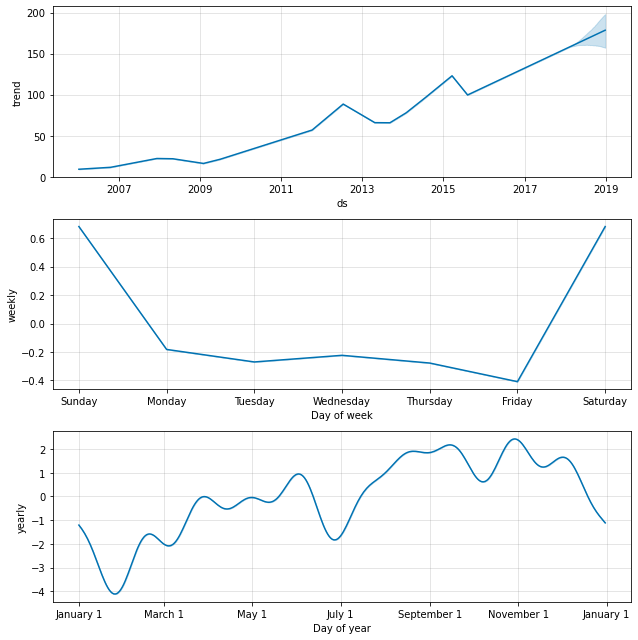

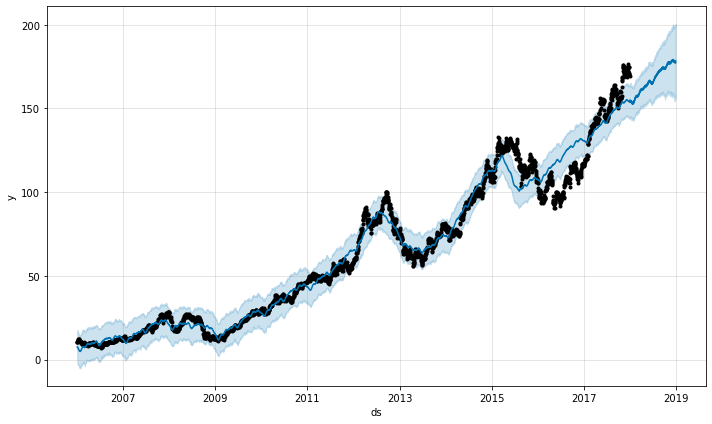

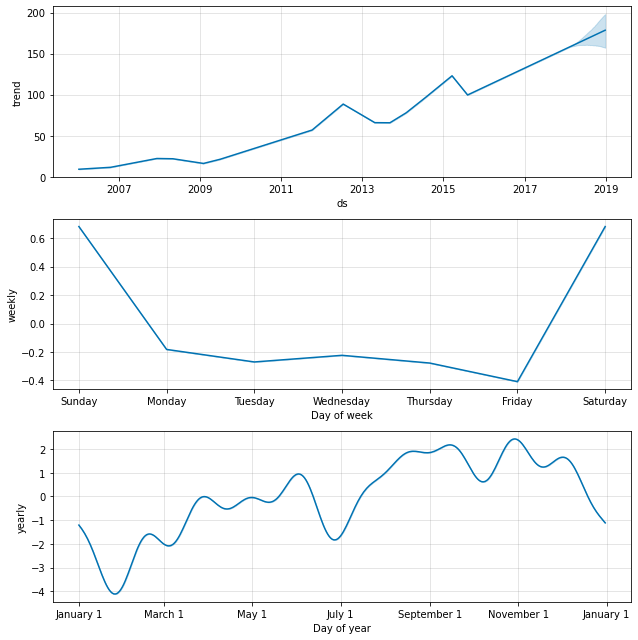

In [8]:
model = Prophet()
aapl = aapl.drop(columns=['Open', 'Month', 'Year', 'Week'])
aapl = aapl.rename(columns={'Close': 'y'})

model.fit(aapl)

future = model.make_future_dataframe(periods=365)

pred = model.predict(future)

model.plot(pred)
model.plot_components(pred)

In [9]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [10]:
df_cv = cross_validation(model, initial = '3650 days', period = '180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-05,131.317606,124.549547,138.376831,102.71,2016-01-04
1,2016-01-06,131.605196,124.894291,137.931757,100.70,2016-01-04
2,2016-01-07,131.791058,125.213923,138.510125,96.45,2016-01-04
3,2016-01-08,131.947010,125.233848,139.356414,96.96,2016-01-04
4,2016-01-11,132.476067,125.552823,139.627004,98.53,2016-01-04


In [11]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,619.623758,24.892243,22.881698,0.223524,0.192955,0.026667
1,38 days,630.431286,25.108391,23.013328,0.225410,0.192955,0.040000
2,39 days,628.687935,25.073650,22.885815,0.223280,0.182935,0.040000
3,40 days,618.792331,24.875537,22.650559,0.219678,0.179547,0.040000
4,41 days,624.005119,24.980094,22.743199,0.219690,0.179547,0.053333


C:\Users\Mike\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Mike\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


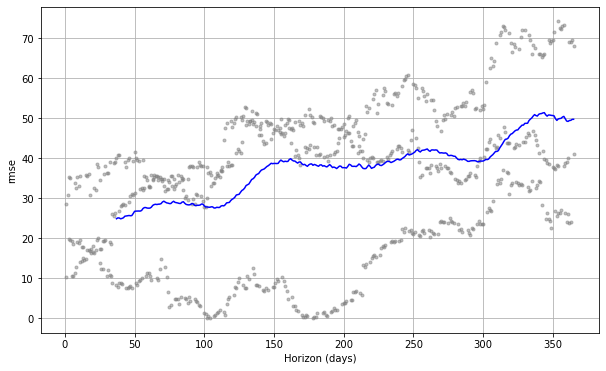

In [12]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

## AMZN Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


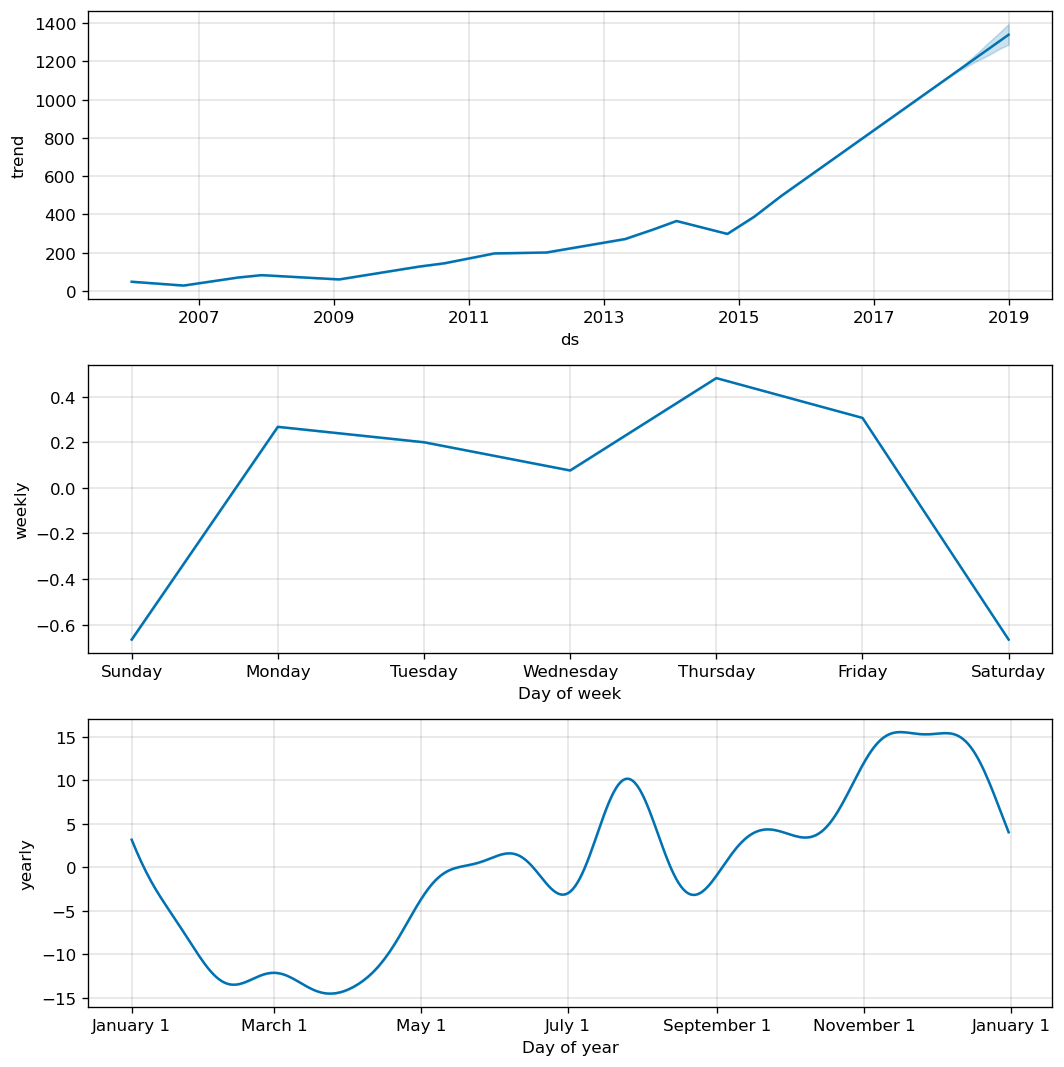

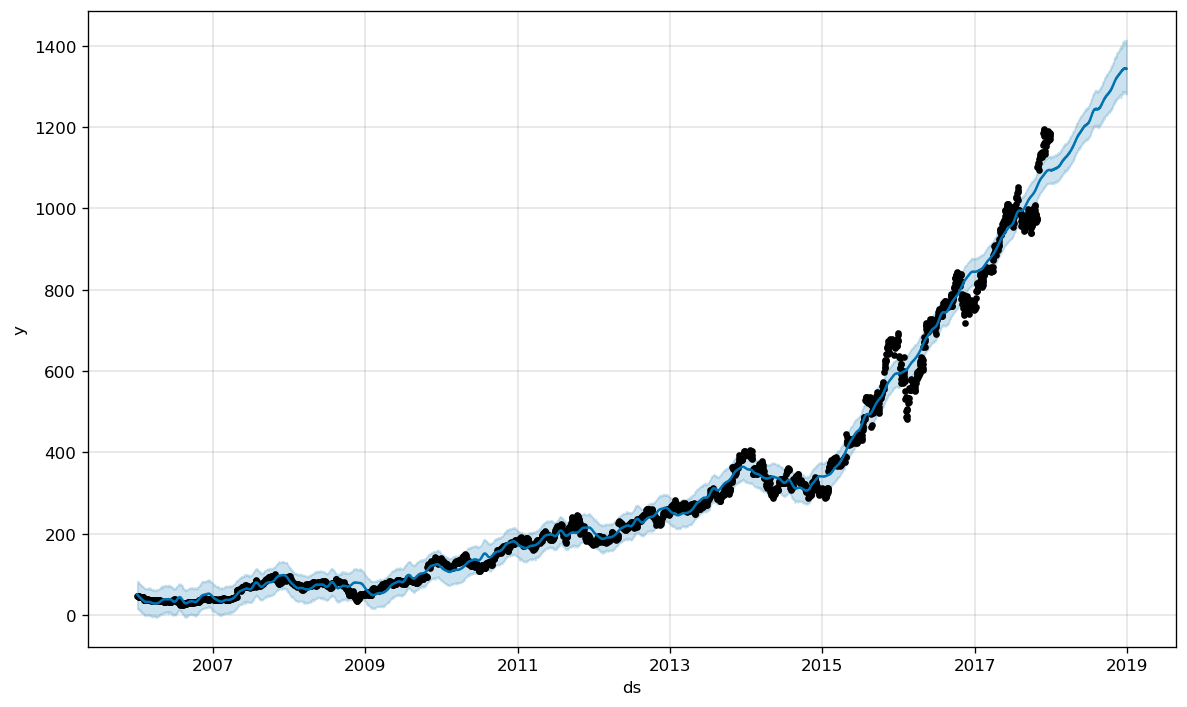

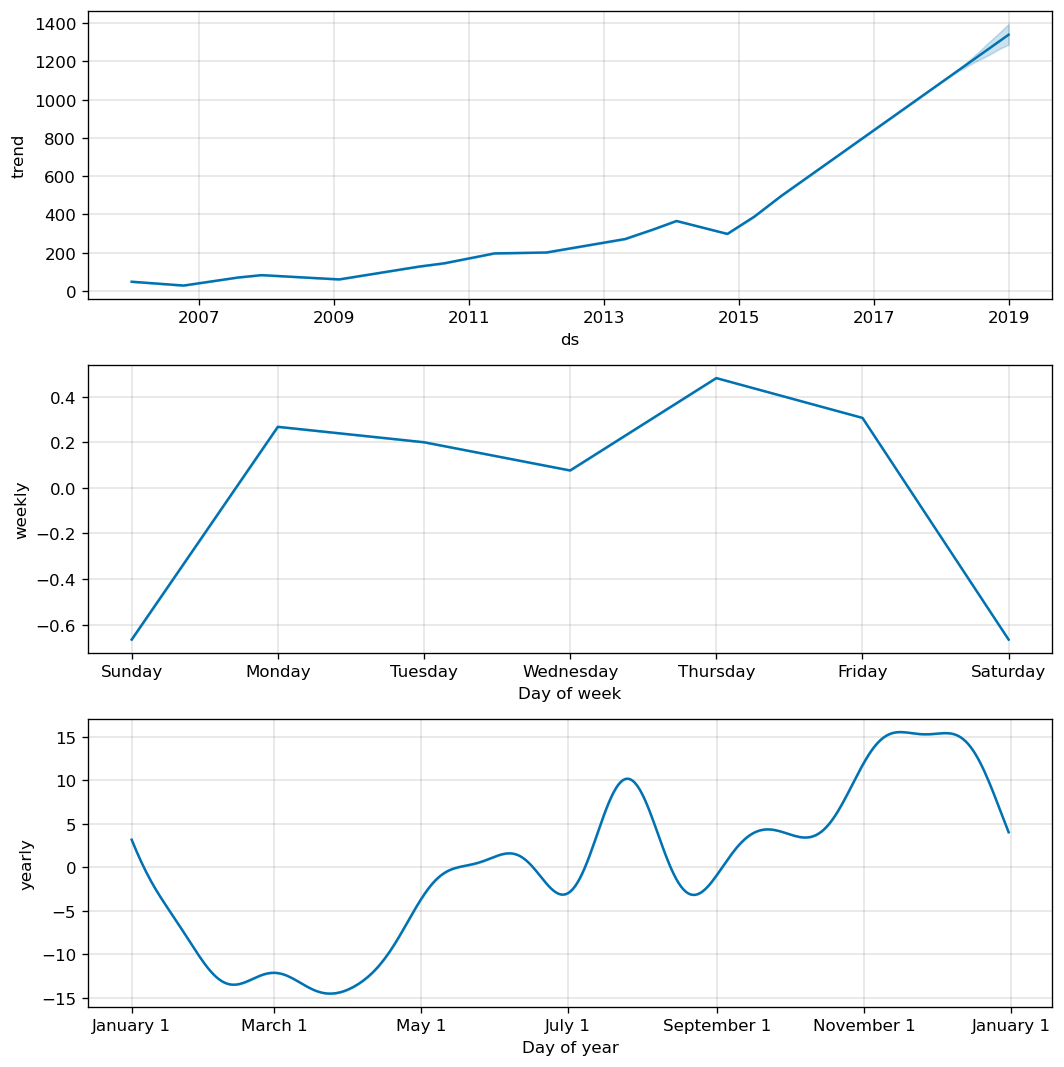

In [74]:
model = Prophet()
#amzn = amzn.drop(columns=['Open', 'Month', 'Year', 'Week'])
#amzn = amzn.rename(columns={'Close': 'y'})

model.fit(amzn)

pred = model.predict(future)

model.plot(pred)
model.plot_components(pred)

In [75]:
df_cv = cross_validation(model, initial = '3650 days', period = '180 days', horizon = '365 days')
df_cv.head()


INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-05,536.284667,493.489994,581.672999,633.79,2016-01-04
1,2016-01-06,535.419053,490.255114,576.846894,632.65,2016-01-04
2,2016-01-07,536.079100,491.726290,583.159703,607.94,2016-01-04
3,2016-01-08,534.988113,491.102567,581.360583,607.05,2016-01-04
4,2016-01-11,533.791695,487.041759,577.222115,617.74,2016-01-04


In [76]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,2614.156516,51.128823,45.412294,0.067236,0.069082,0.320000
1,38 days,2467.458339,49.673517,44.335905,0.065770,0.069082,0.333333
2,39 days,2328.110476,48.250497,43.205672,0.063828,0.066715,0.346667
3,40 days,2288.239738,47.835549,42.781708,0.062874,0.066480,0.360000
4,41 days,2233.319031,47.258005,42.210710,0.062036,0.065692,0.373333


INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\Mike\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Mike\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


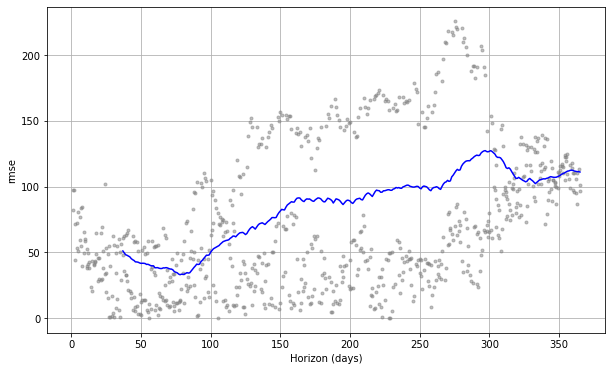

In [14]:

fig = plot_cross_validation_metric(df_cv, metric='rmse')

## GOOGL Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


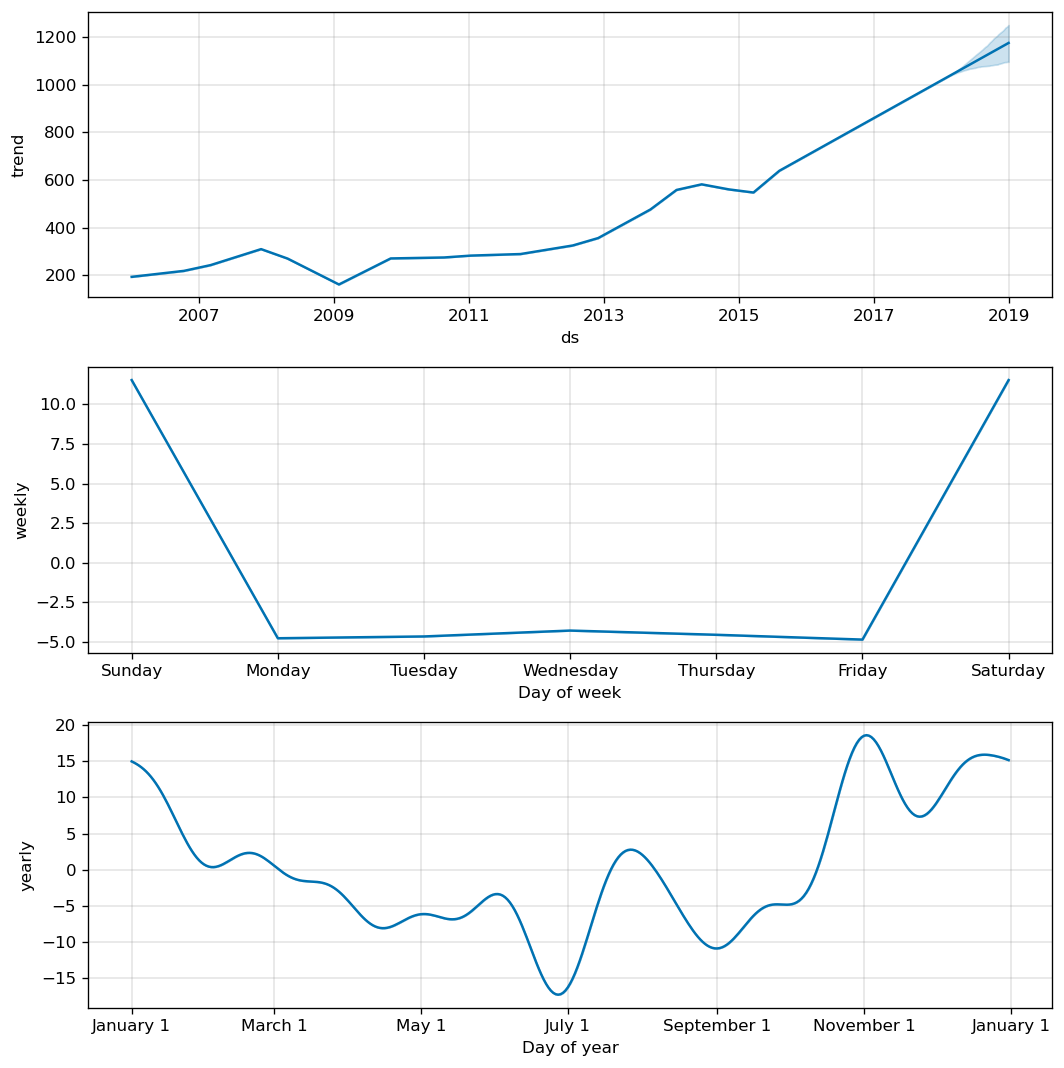

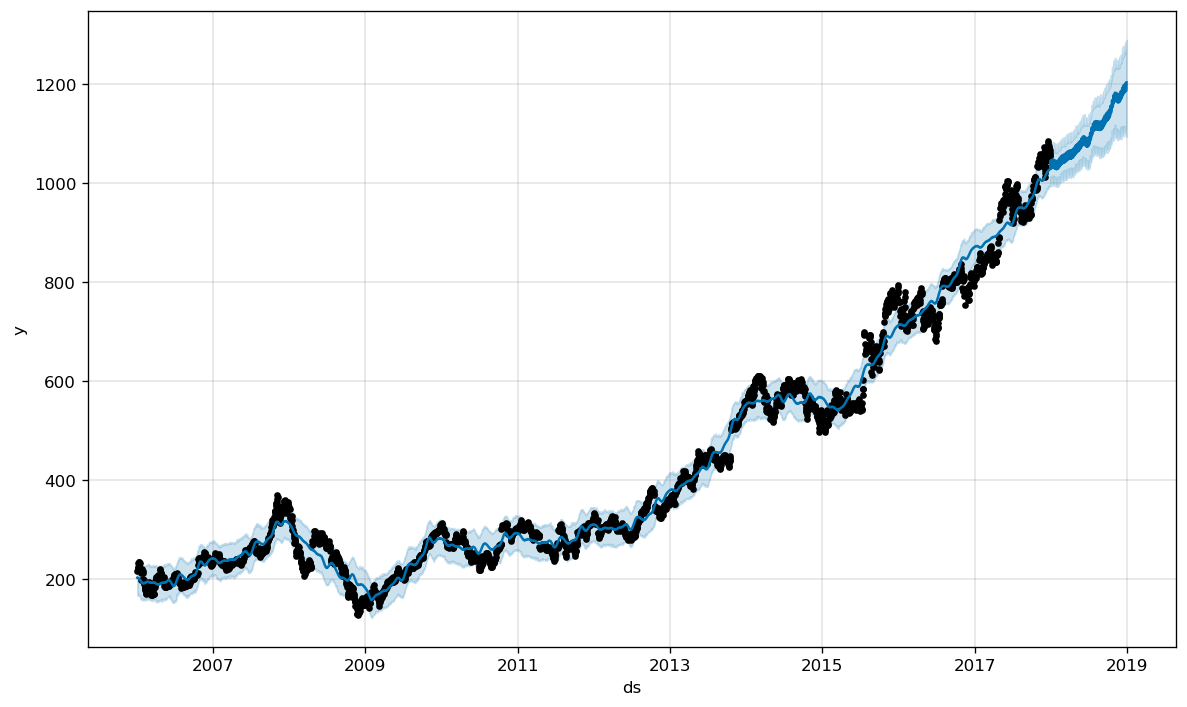

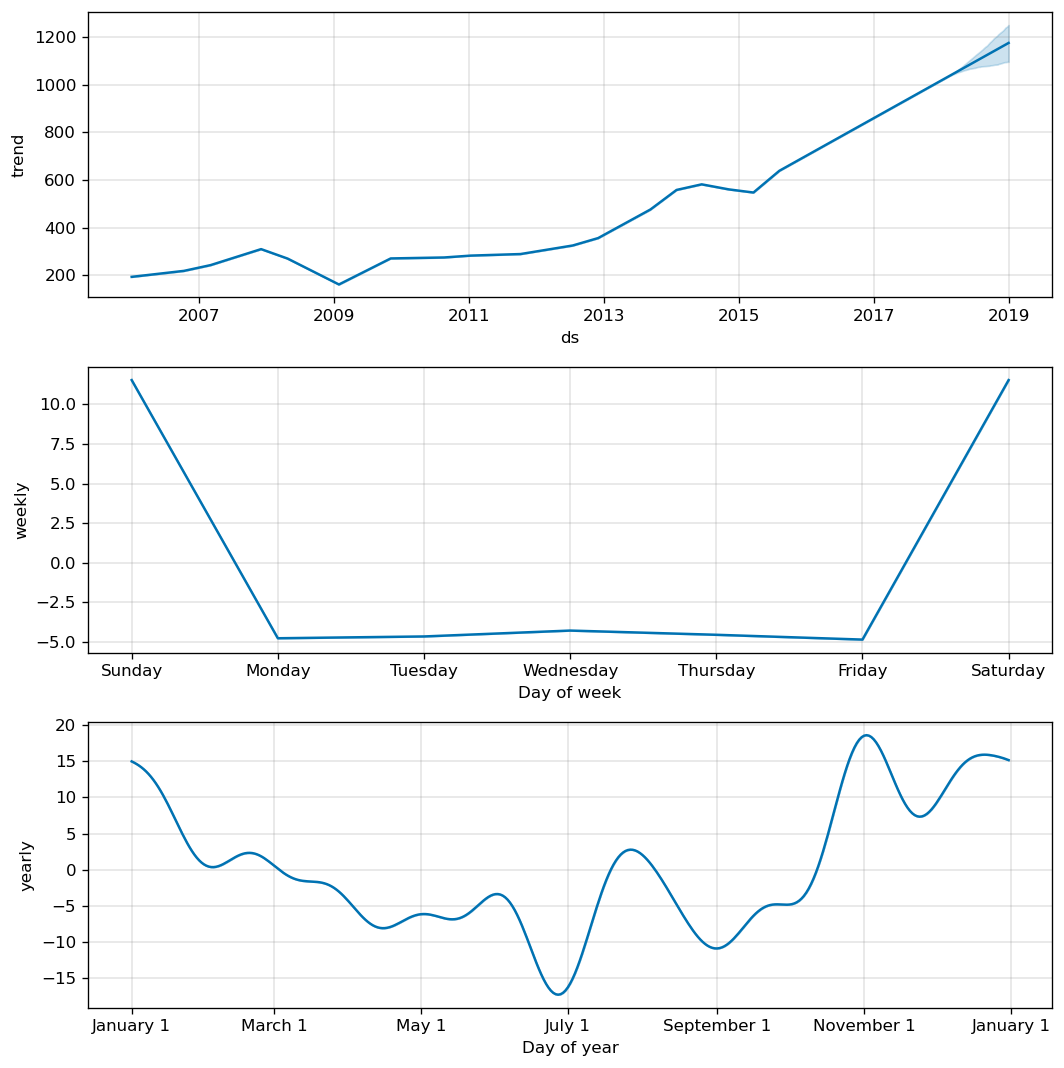

In [78]:
model = Prophet()
#googl = googl.drop(columns=['Open', 'Month', 'Year', 'Week'])
#googl = googl.rename(columns={'Close': 'y'})

model.fit(googl)

pred = model.predict(future)

model.plot(pred)
model.plot_components(pred)

In [79]:
df_cv = cross_validation(model, initial = '3650 days', period = '180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-05,681.969071,642.302619,718.716604,761.53,2016-01-04
1,2016-01-06,681.963966,638.132502,723.241633,759.33,2016-01-04
2,2016-01-07,681.943536,642.109294,719.745688,741.00,2016-01-04
3,2016-01-08,680.860810,641.118675,720.772815,730.91,2016-01-04
4,2016-01-11,679.483111,639.669349,718.007408,733.07,2016-01-04


In [80]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,1881.776146,43.379444,35.401285,0.046465,0.040204,0.573333
1,38 days,1810.705215,42.552382,34.762925,0.045653,0.040204,0.586667
2,39 days,1736.915414,41.676317,34.063541,0.044619,0.040204,0.600000
3,40 days,1739.735596,41.710138,34.022919,0.044416,0.040204,0.600000
4,41 days,1750.594717,41.840109,34.055221,0.044382,0.035114,0.600000


INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\Mike\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Mike\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


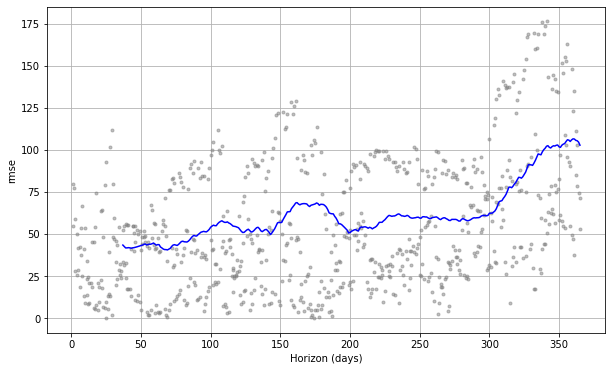

In [16]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

## NKE Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


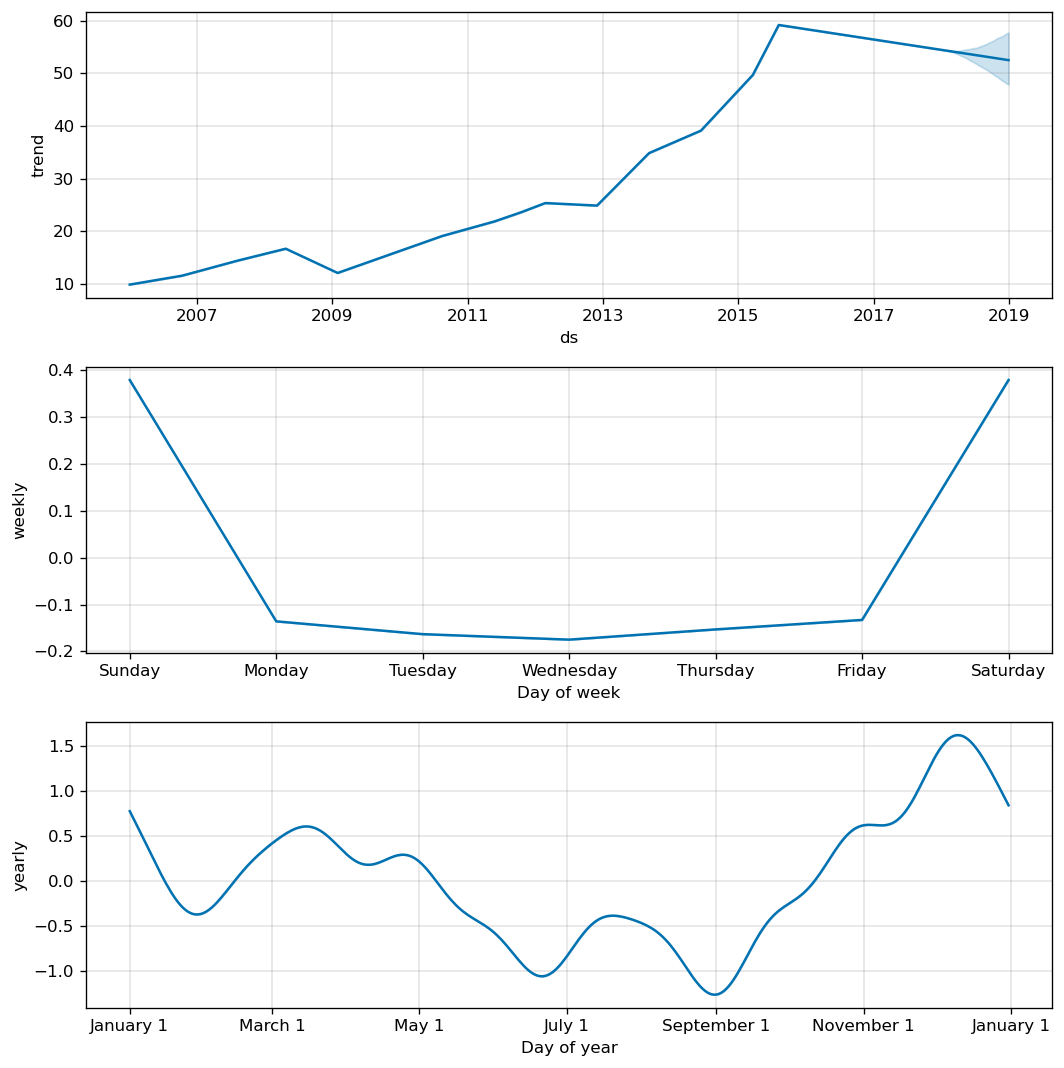

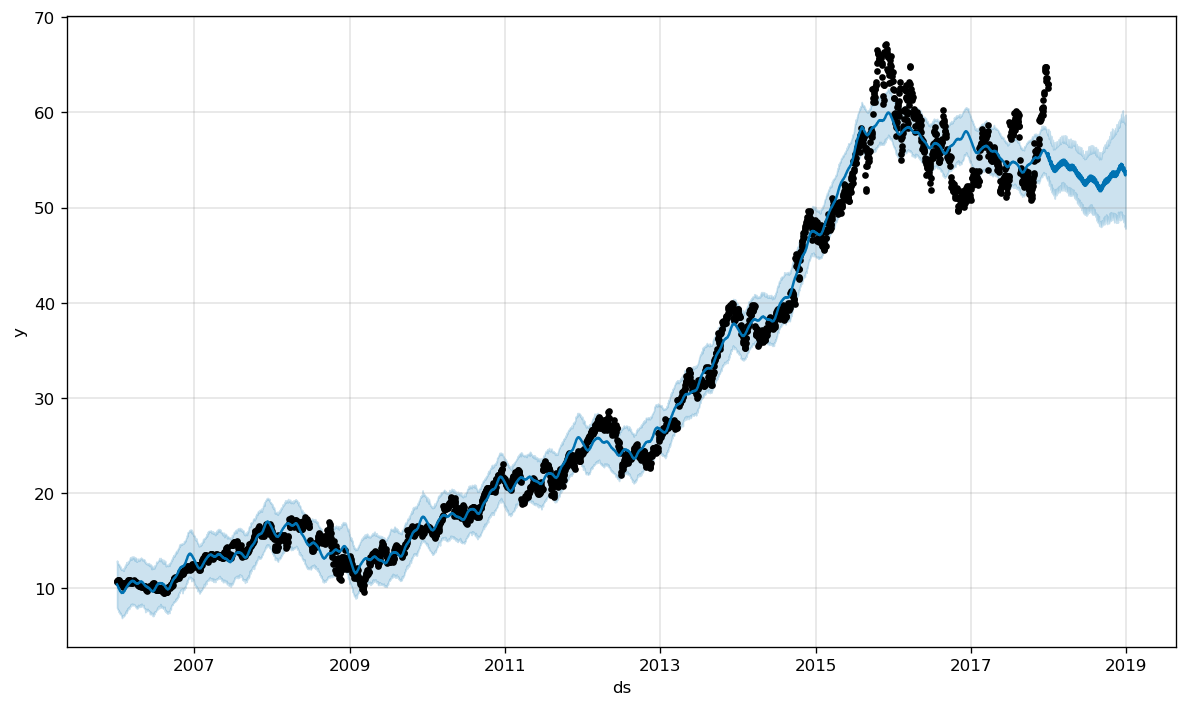

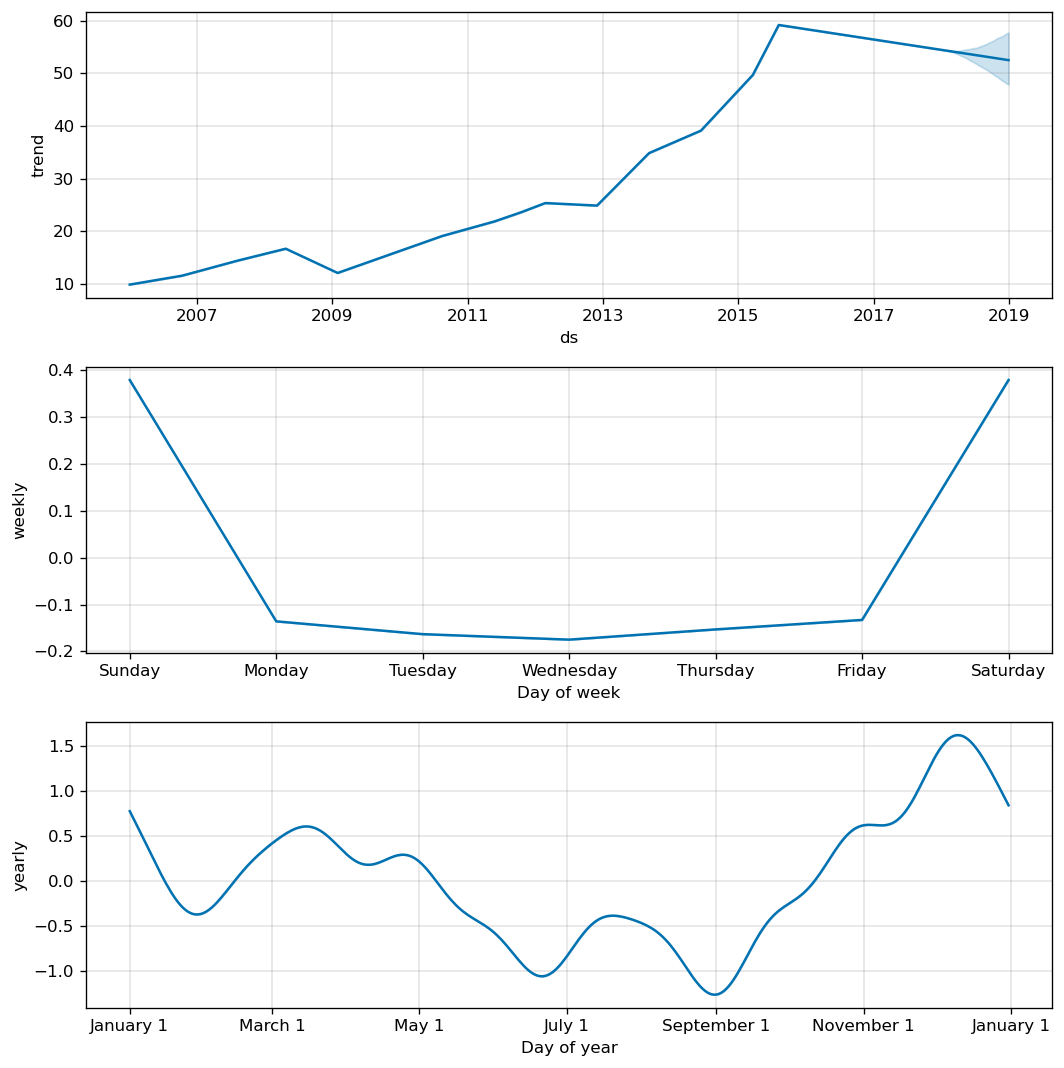

In [81]:
model = Prophet()
#nke = nke.drop(columns=['Open', 'Month', 'Year', 'Week'])
#nke = nke.rename(columns={'Close': 'y'})

model.fit(nke)

pred = model.predict(future)

model.plot(pred)
model.plot_components(pred)

In [82]:
df_cv = cross_validation(model, initial = '3650 days', period = '180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-05,62.956887,61.135604,64.695490,62.38,2016-01-04
1,2016-01-06,62.942819,61.032831,64.716297,61.49,2016-01-04
2,2016-01-07,62.991123,61.252695,64.880251,59.85,2016-01-04
3,2016-01-08,63.021867,61.264954,64.823618,58.87,2016-01-04
4,2016-01-11,62.991790,61.171755,64.746660,59.55,2016-01-04


In [83]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,49.574921,7.040946,6.458807,0.116880,0.136921,0.093333
1,38 days,50.263860,7.089701,6.548343,0.118261,0.136921,0.080000
2,39 days,52.047303,7.214382,6.710706,0.121351,0.138564,0.066667
3,40 days,52.789875,7.265664,6.769040,0.122523,0.140837,0.066667
4,41 days,52.553044,7.249348,6.753247,0.122121,0.138564,0.066667


INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\Mike\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Mike\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


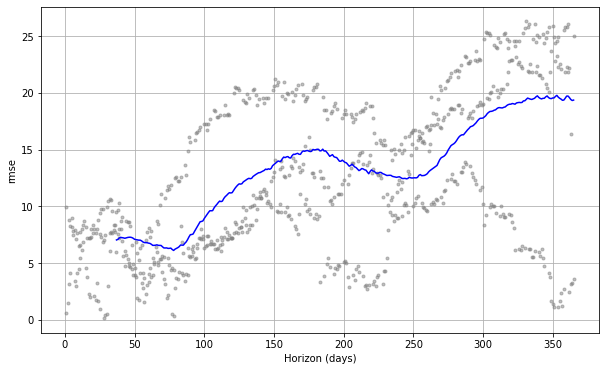

In [18]:

fig = plot_cross_validation_metric(df_cv, metric='rmse')

## VZ Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


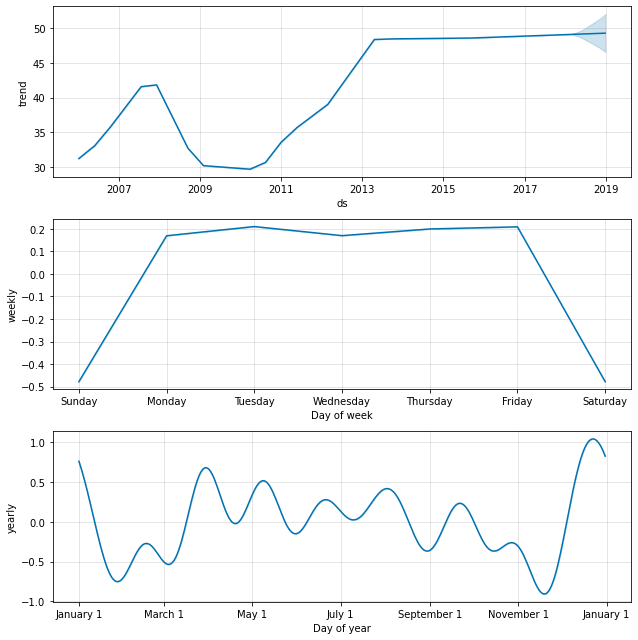

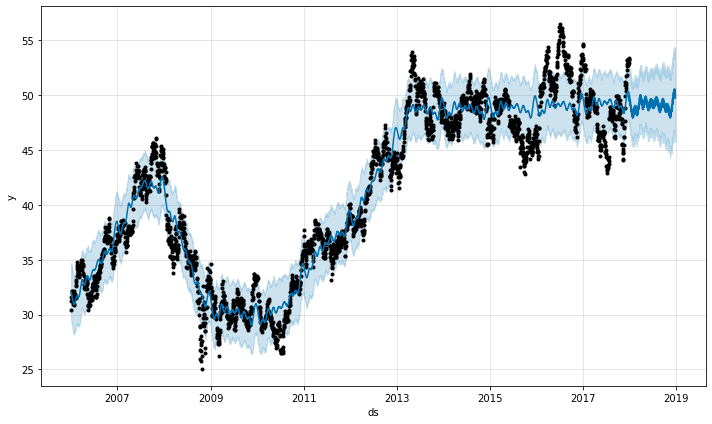

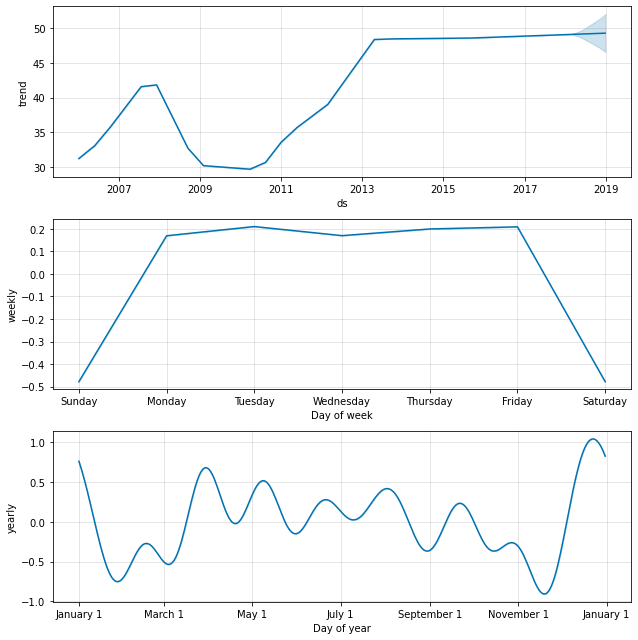

In [19]:
model = Prophet()
vz = vz.drop(columns=['Open', 'Month', 'Year', 'Week'])
vz = vz.rename(columns={'Close': 'y'})

model.fit(vz)

pred = model.predict(future)

model.plot(pred)
model.plot_components(pred)

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\Mike\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Mike\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


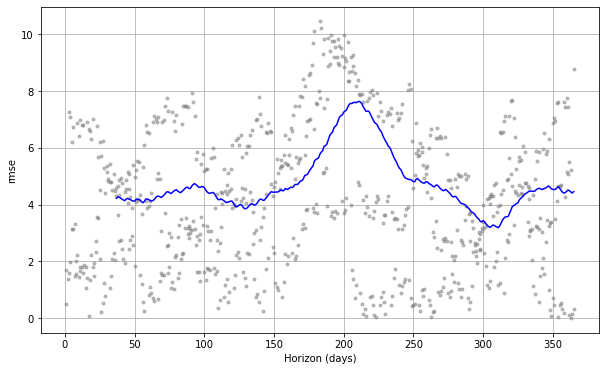

In [20]:
df_cv = cross_validation(model, initial = '3650 days', period = '180 days', horizon = '365 days')
df_cv.head()

df_p = performance_metrics(df_cv)
df_p.head()

fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [72]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,17.819031,4.221259,3.608861,0.068263,0.057844,0.413333
1,38 days,18.243813,4.271278,3.690225,0.069836,0.071909,0.386667
2,39 days,18.145760,4.259784,3.712524,0.070360,0.072512,0.360000
3,40 days,17.853158,4.225300,3.694598,0.070086,0.072512,0.360000
4,41 days,17.593571,4.194469,3.666478,0.069690,0.072512,0.360000


<h1><center>Arima Models</center></h1>

#### RMSE Values were better than FBProphet for a few, and much worse on the others, still not good enough to be considered accurate


# Is data Stationary?

In [21]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [22]:
#aapl is not stationary

aapl_df = pd.read_csv('aapl stock.csv', header=0)

aapl_result = adfuller(aapl_df['Close'].dropna())
print('ADF Statistic: %f' % aapl_result[0])
print('p-value: %f' % aapl_result[1])

ADF Statistic: 0.552367
p-value: 0.986381


In [23]:
#amzn is not stationary

amzn_df = pd.read_csv('amzn stock.csv', header=0)

amzn_result = adfuller(amzn_df['Close'].dropna())
print('ADF Statistic: %f' % amzn_result[0])
print('p-value: %f' % amzn_result[1])

ADF Statistic: 2.963808
p-value: 1.000000


In [24]:
#GOOGL is not stationary

googl_df = pd.read_csv('googl stock.csv', header=0)

googl_result = adfuller(googl_df['Close'].dropna())
print('ADF Statistic: %f' % googl_result[0])
print('p-value: %f' % googl_result[1])

ADF Statistic: 1.322424
p-value: 0.996732


In [25]:
#nke is not stationary

nke_df = pd.read_csv('nke stock.csv', header=0)

nke_result = adfuller(nke_df['Close'].dropna())
print('ADF Statistic: %f' % nke_result[0])
print('p-value: %f' % nke_result[1])

ADF Statistic: 0.180609
p-value: 0.971153


In [26]:
#vz is not stationary

vz_df = pd.read_csv('vz stock.csv', header=0)

vz_result = adfuller(vz_df['Close'].dropna())
print('ADF Statistic: %f' % vz_result[0])
print('p-value: %f' % vz_result[1])

ADF Statistic: -1.627142
p-value: 0.468987


# Find order of differencing (d-value)

#### Using 1 for all

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

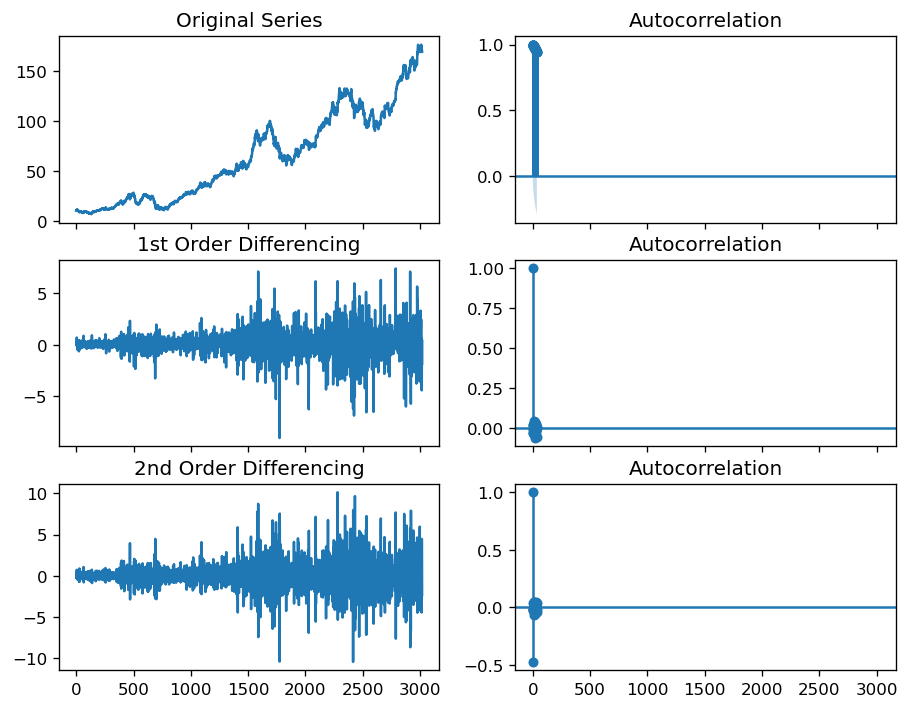

In [28]:
# AAPL DATA

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(aapl_df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(aapl_df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(aapl_df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(aapl_df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(aapl_df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(aapl_df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

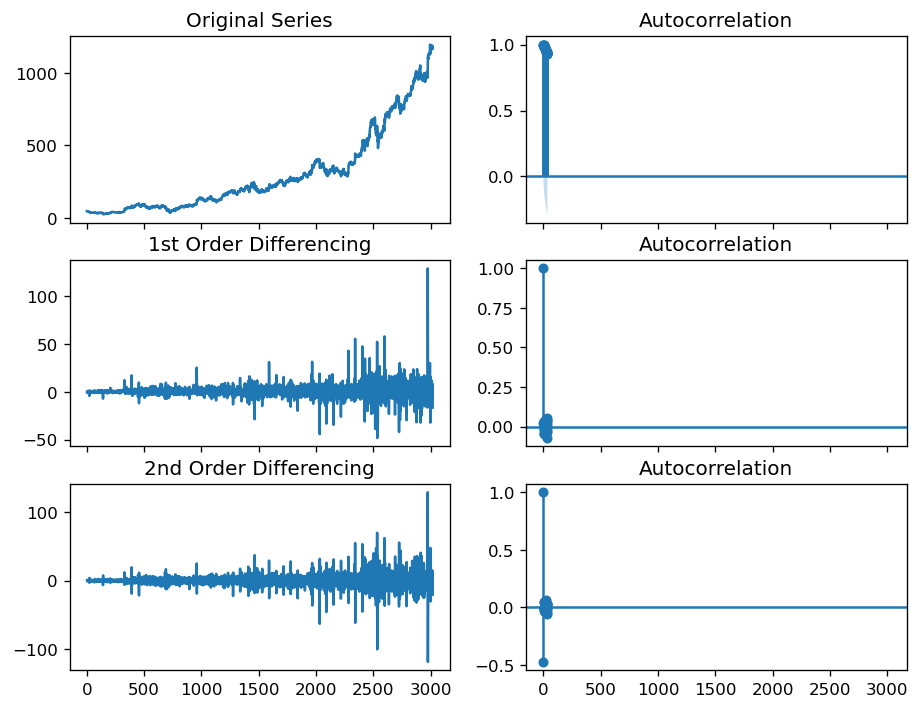

In [29]:
# amzn DATA

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(amzn_df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(amzn_df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(amzn_df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(amzn_df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(amzn_df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(amzn_df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

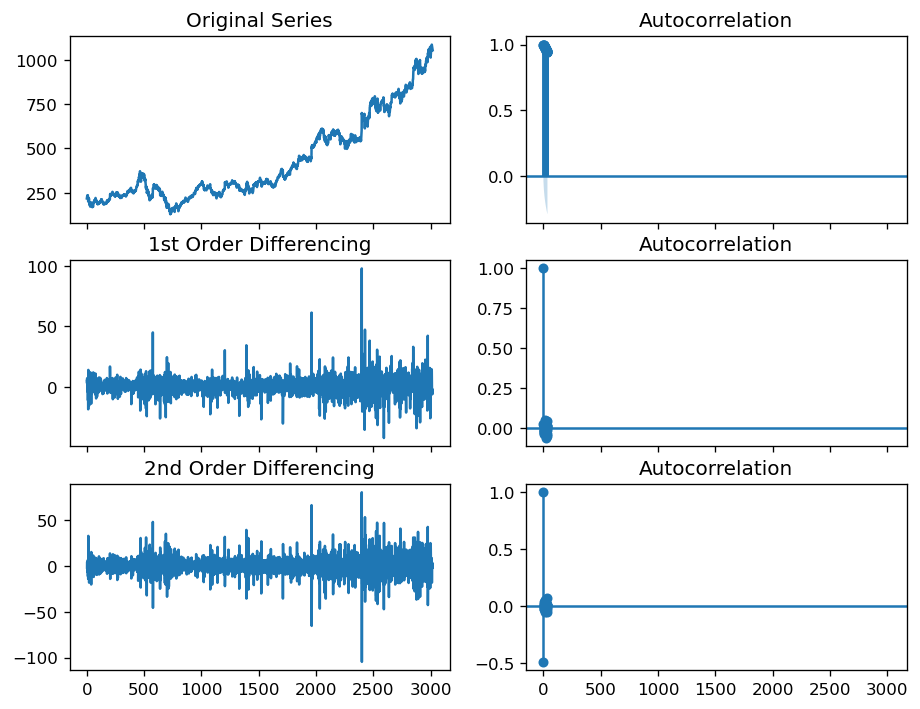

In [30]:
# GOOGL DATA

# Import data
df = pd.read_csv('googl stock.csv', header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(googl_df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(googl_df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(googl_df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(googl_df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(googl_df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(googl_df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

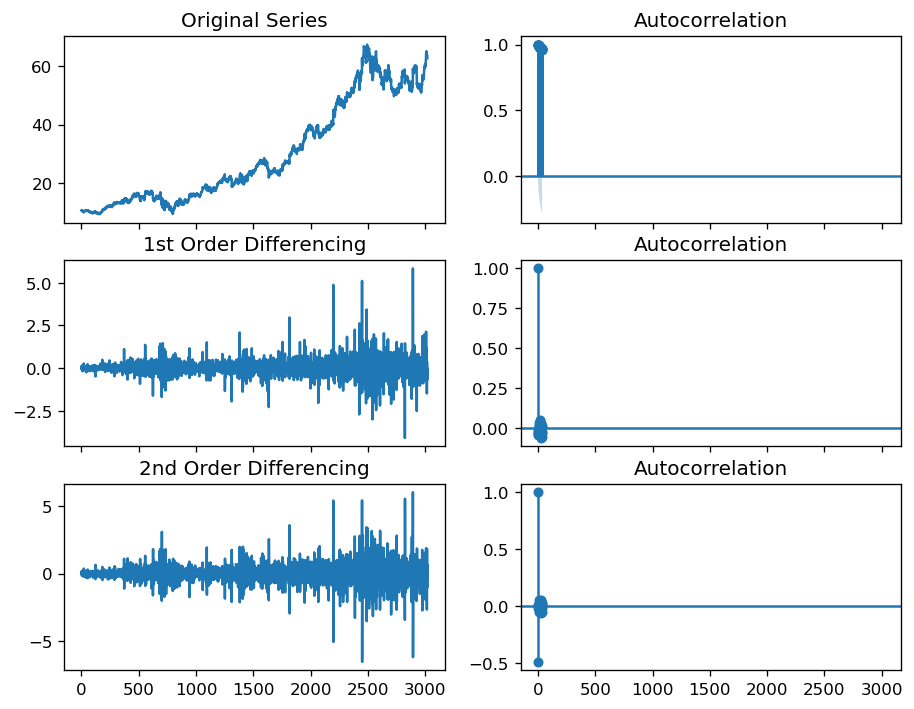

In [31]:
# NKE DATA

# Import data
df = pd.read_csv('nke stock.csv', header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(nke_df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(nke_df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(nke_df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(nke_df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(nke_df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(nke_df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

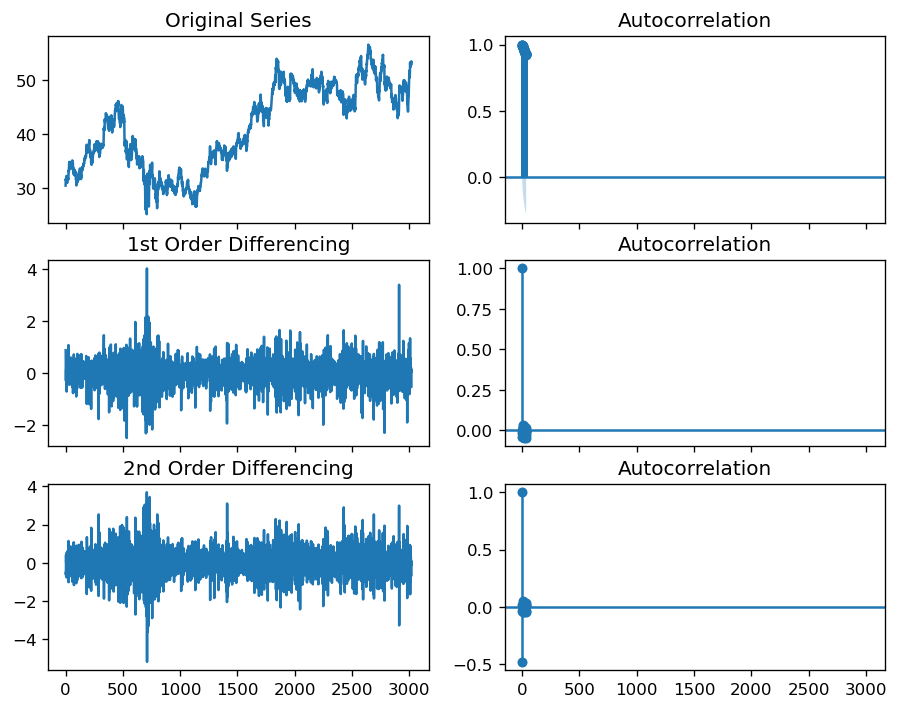

In [32]:
# VZ DATA

# Import data
df = pd.read_csv('vz stock.csv', header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(vz_df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(vz_df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(vz_df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(vz_df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(vz_df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(vz_df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

# find order of AR (p)

#### Using 1 for all

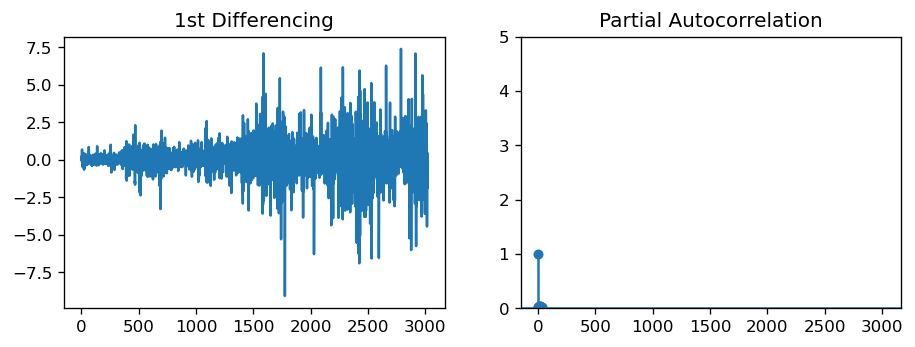

In [33]:
# AAPL DATA

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(aapl_df['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(aapl_df['Close'].diff().dropna(), ax=axes[1])

plt.show()


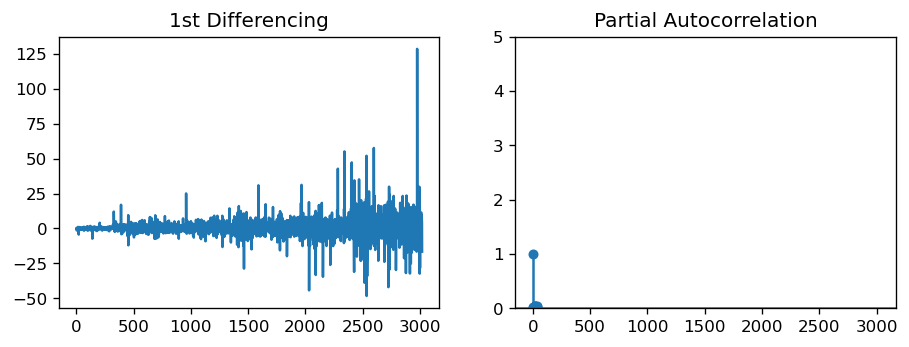

In [34]:
# amzn DATA

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(amzn_df['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(amzn_df['Close'].diff().dropna(), ax=axes[1])

plt.show()

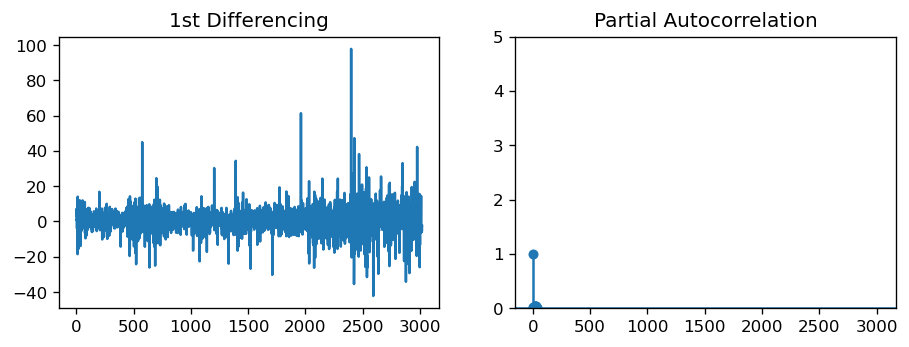

In [35]:
# GOOGL DATA

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(googl_df['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(googl_df['Close'].diff().dropna(), ax=axes[1])

plt.show()

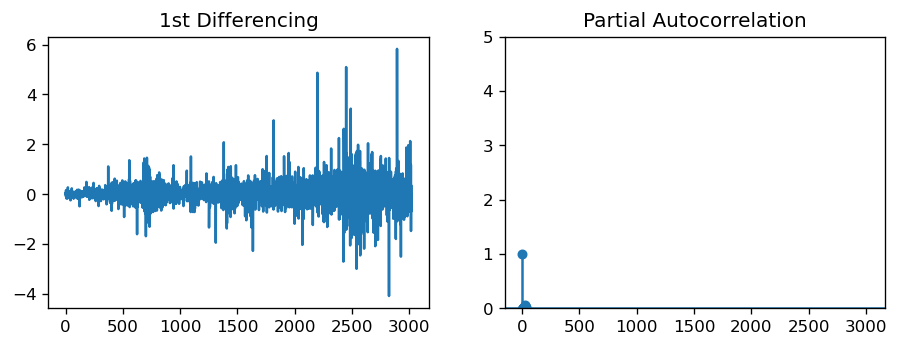

In [36]:
# NKE DATA


# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(nke_df['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(nke_df['Close'].diff().dropna(), ax=axes[1])

plt.show()

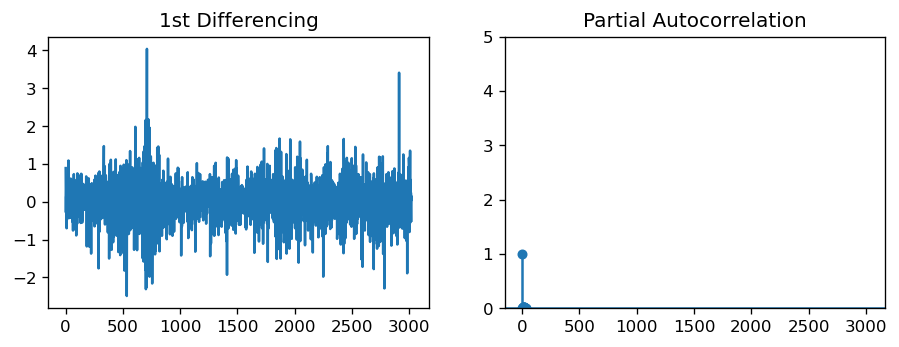

In [37]:
# VZ DATA


# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(vz_df['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(vz_df['Close'].diff().dropna(), ax=axes[1])

plt.show()

# find order of MA term(q)

#### Using 1 for all

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

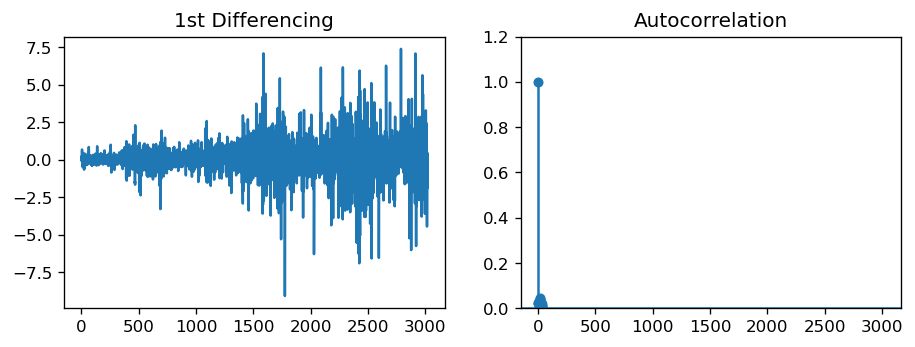

In [39]:
# AAPL DATA

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(aapl_df['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(aapl_df['Close'].diff().dropna(), ax=axes[1])

plt.show()

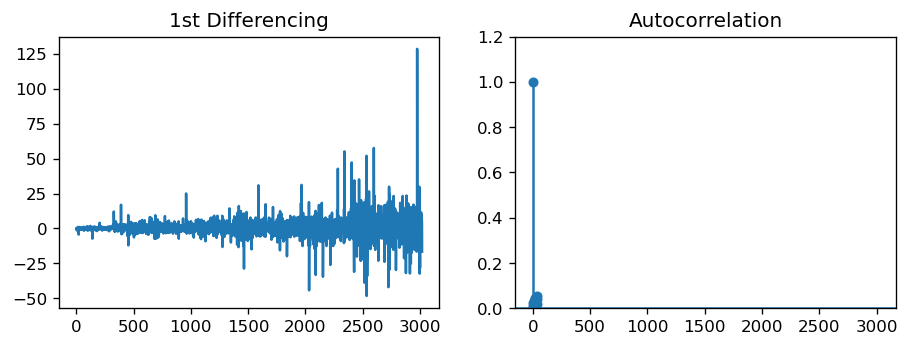

In [40]:
# amzn DATA


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(amzn_df['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(amzn_df['Close'].diff().dropna(), ax=axes[1])

plt.show()

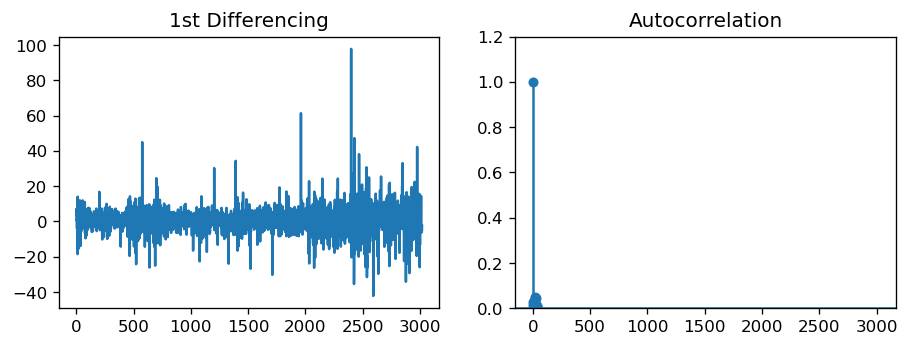

In [41]:
# GOOGL DATA

# Import data

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(googl_df['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(googl_df['Close'].diff().dropna(), ax=axes[1])

plt.show()

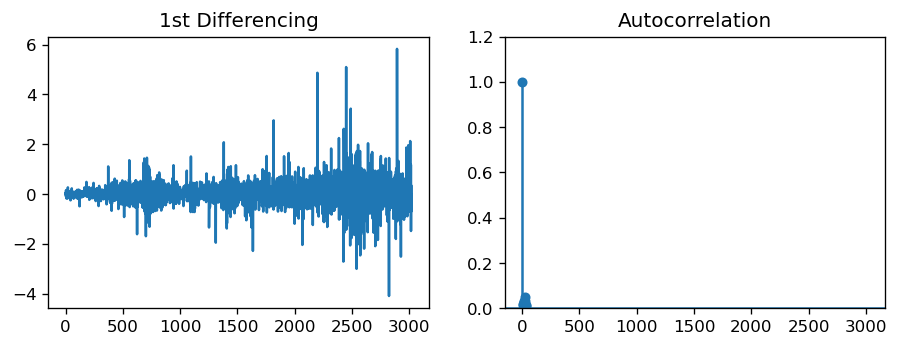

In [42]:
# NKE DATA

# Import data
nke_df = pd.read_csv('nke stock.csv', header=0)

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(nke_df['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(nke_df['Close'].diff().dropna(), ax=axes[1])

plt.show()

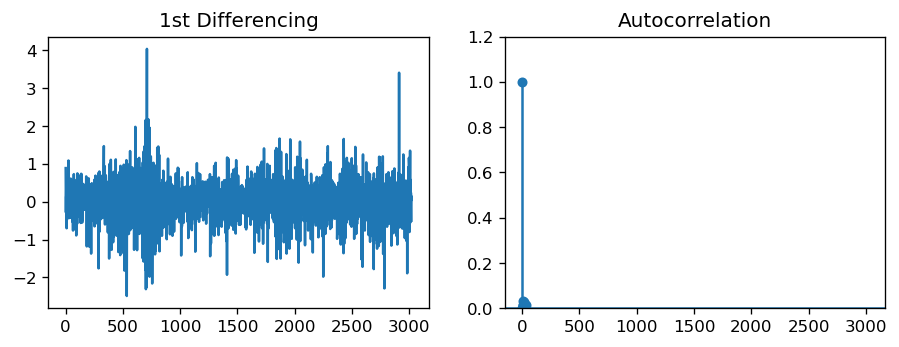

In [43]:
# VZ DATA


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(vz_df['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(vz_df['Close'].diff().dropna(), ax=axes[1])

plt.show()

## Actually Building ARIMA Model

In [84]:
# build function for RMSE

def forecast_accuracy(fc, test):
    rmse = np.mean((fc - test)**2)**.5  # RMSE
    return({'rmse':rmse})

In [44]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# AAPL

### RMSE is 18.178073027724427

In [45]:
aapl_model = ARIMA(aapl_df['Close'], order=(1,1,1))
aapl_model_fit = aapl_model.fit()

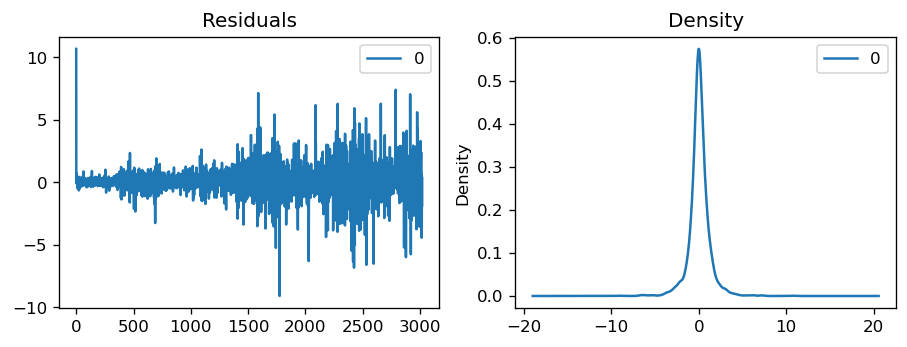

In [46]:
# Plot residual errors
residuals = pd.DataFrame(aapl_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2200
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -2849.963
Date:                Fri, 10 Jun 2022   AIC                           5709.926
Time:                        12:19:45   BIC                           5738.402
Sample:                             0   HQIC                          5720.332
                               - 2200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0124      0.015      0.830      0.406      -0.017       0.042
ar.L2         -0.0159      0.015     -1.060      0.289      -0.045       0.014
ar.L3         -0.0132      0.015     -0.886      0.3

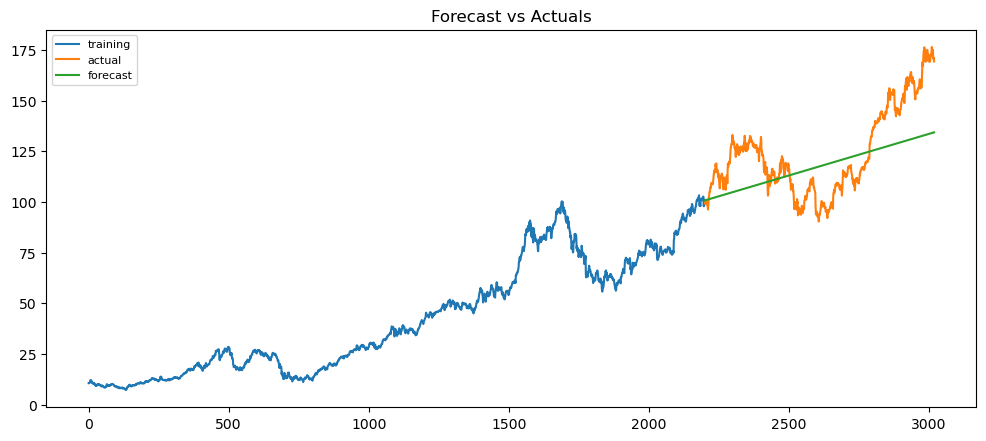

In [85]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = aapl_df.Close[:2200]
test = aapl_df.Close[2200:]

# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc = fitted.forecast(819)  # 95% conf
conf = 0.05

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [86]:
forecast_accuracy(fc, test)

{'rmse': 18.178073027724427}

<AxesSubplot:>

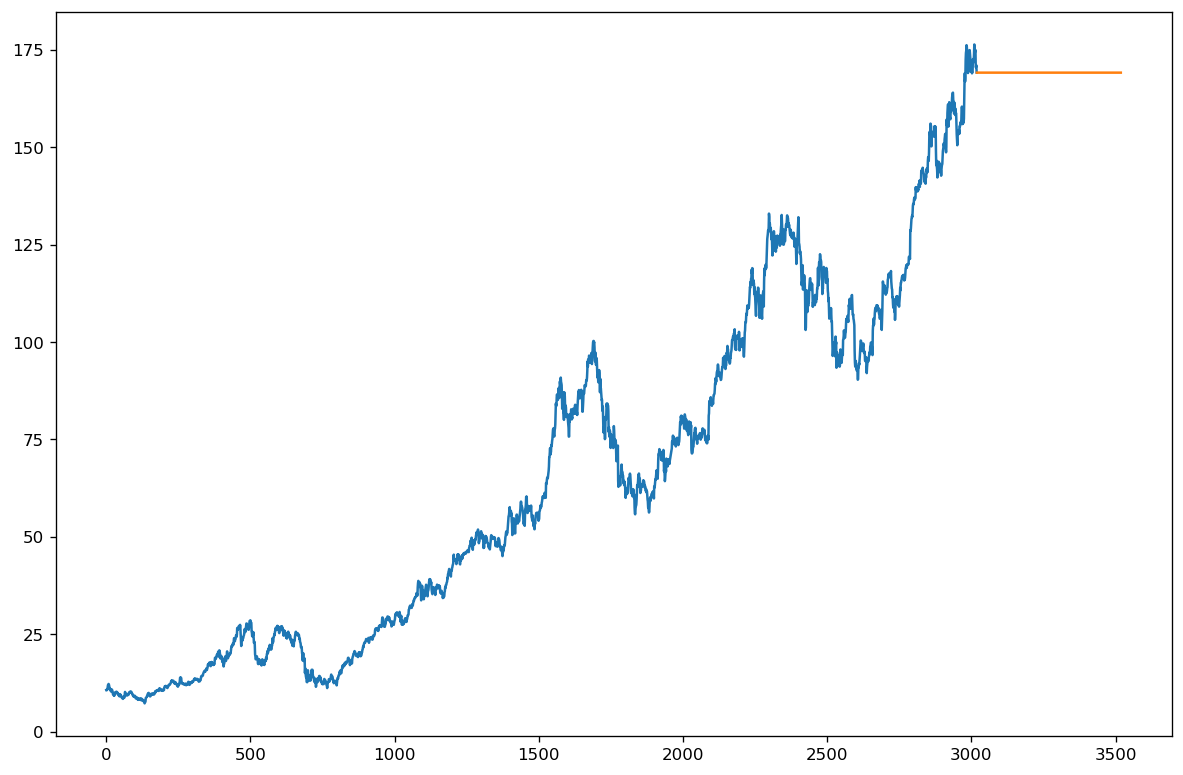

In [48]:
aapl_df['Close'].plot(figsize=(12,8))
aapl_model_fit.forecast(500).plot(figsize=(12,8))

# AMZN

### RMSE is 146.55111994047599

In [49]:
amzn_model = ARIMA(amzn_df['Close'], order=(1,1,1))
amzn_model_fit = amzn_model.fit()

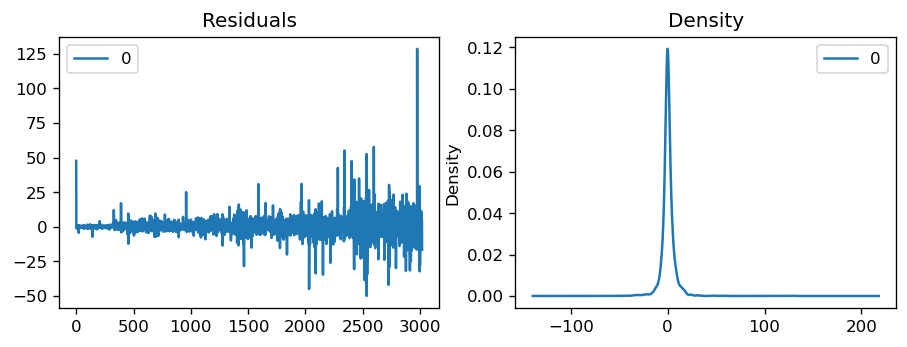

In [50]:
# Plot residual errors
residuals = pd.DataFrame(amzn_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2500
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -7465.064
Date:                Fri, 10 Jun 2022   AIC                          14940.129
Time:                        12:24:36   BIC                          14969.245
Sample:                             0   HQIC                         14950.700
                               - 2500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0171      0.011      1.532      0.125      -0.005       0.039
ar.L2         -0.0631      0.013     -4.698      0.000      -0.089      -0.037
ar.L3         -0.0360      0.015     -2.482      0.0

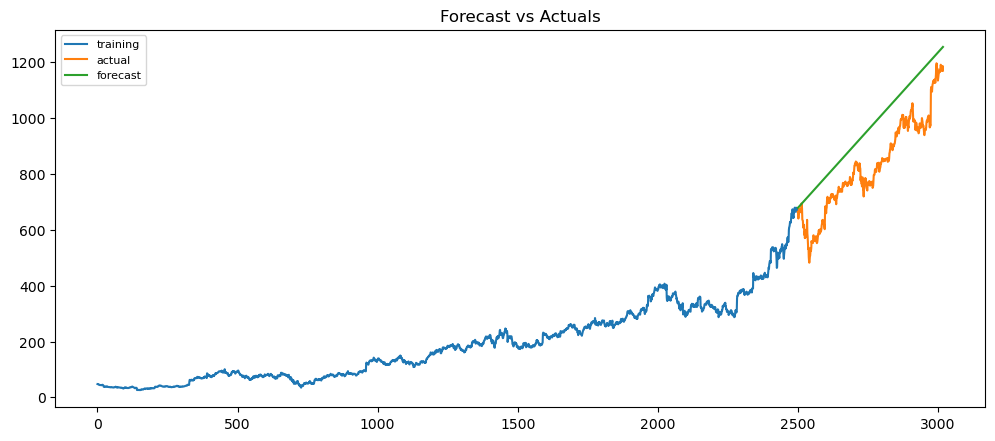

In [101]:
# Create Training and Test
train = amzn_df.Close[:2500]
test = amzn_df.Close[2500:]

# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc = fitted.forecast(519)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [88]:
forecast_accuracy(fc, test)

{'rmse': 146.55111994047599}

<AxesSubplot:>

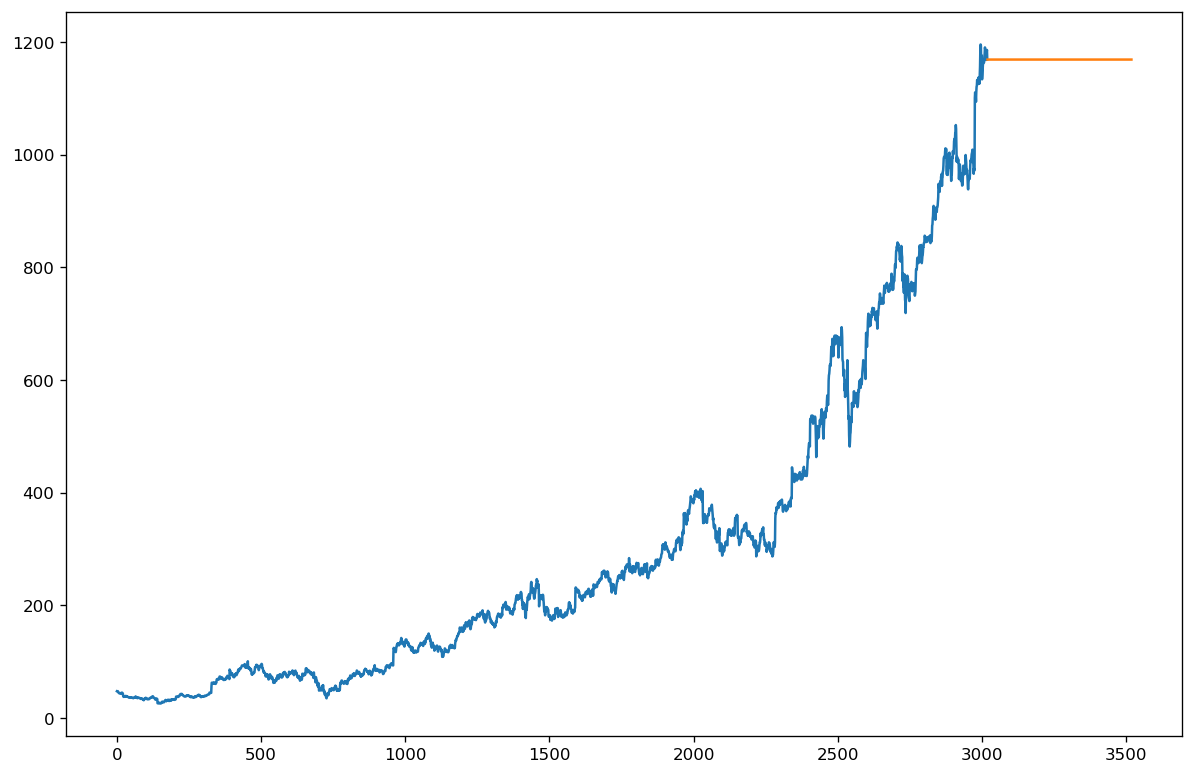

In [52]:
amzn_df['Close'].plot(figsize=(12,8))
amzn_model_fit.forecast(500).plot(figsize=(12,8))

# GOOGL

### RMSE is 66.06066672951988

In [53]:
googl_model = ARIMA(googl_df['Close'], order=(1,1,1))
googl_model_fit = googl_model.fit()


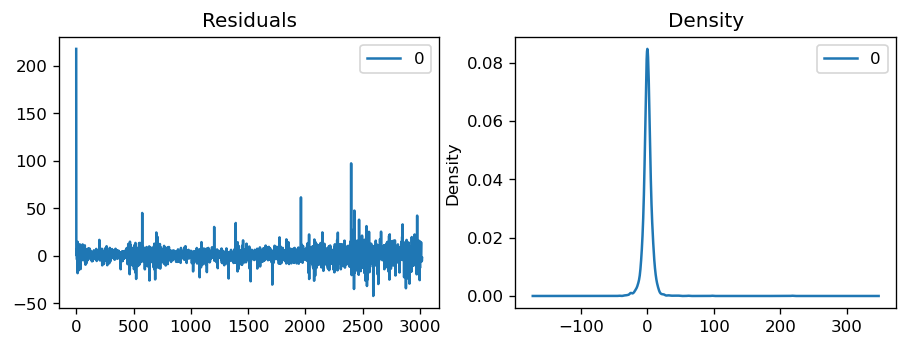

In [54]:
# Plot residual errors
residuals = pd.DataFrame(googl_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2400
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -7674.536
Date:                Fri, 10 Jun 2022   AIC                          15359.071
Time:                        12:21:09   BIC                          15387.983
Sample:                             0   HQIC                         15369.590
                               - 2400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0175      0.017      1.046      0.295      -0.015       0.050
ar.L2          0.0055      0.020      0.279      0.780      -0.033       0.044
ar.L3          0.0064      0.019      0.343      0.7

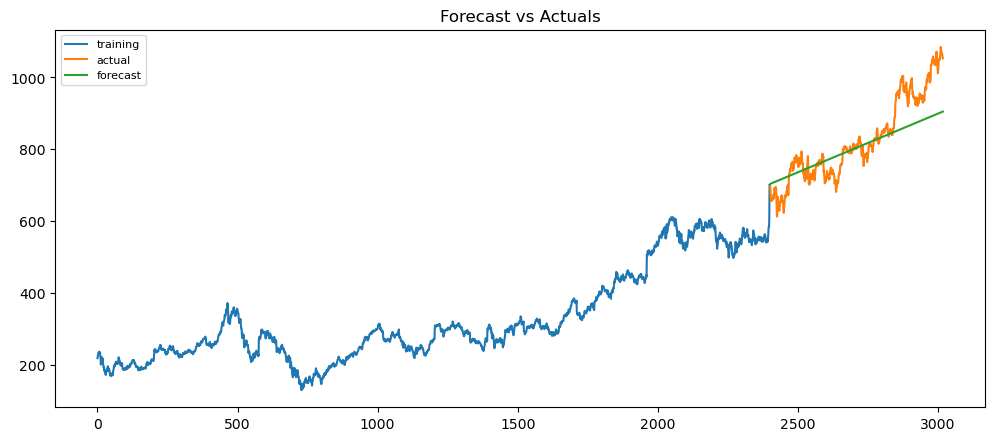

In [89]:
# Create Training and Test
train = googl_df.Close[:2400]
test = googl_df.Close[2400:]

# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc= fitted.forecast(619)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [90]:
forecast_accuracy(fc, test)

{'rmse': 66.06066672951988}

<AxesSubplot:>

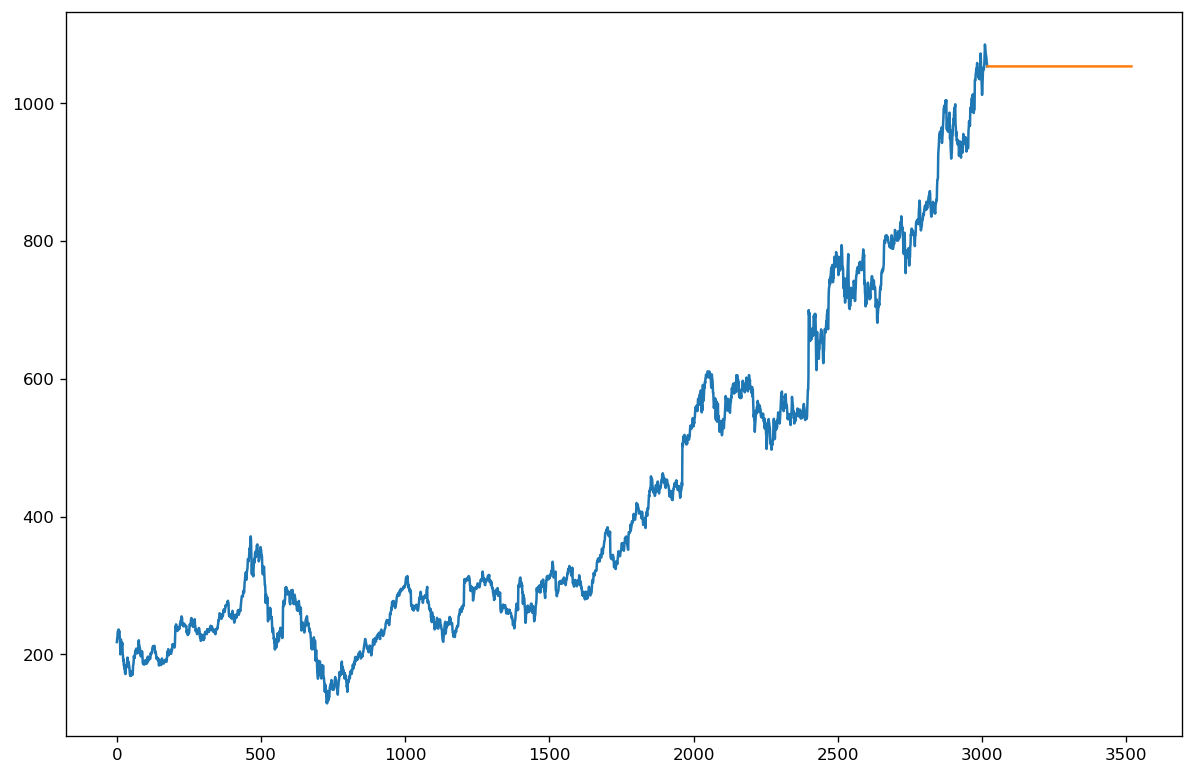

In [56]:
googl_df['Close'].plot(figsize=(12,8))
googl_model_fit.forecast(500).plot(figsize=(12,8))

# NKE

### RMSE is 15.235969506442348

In [57]:
nke_model = ARIMA(nke_df['Close'], order=(1,1,1))
nke_model_fit = nke_model.fit()


C:\Users\Mike\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mike\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


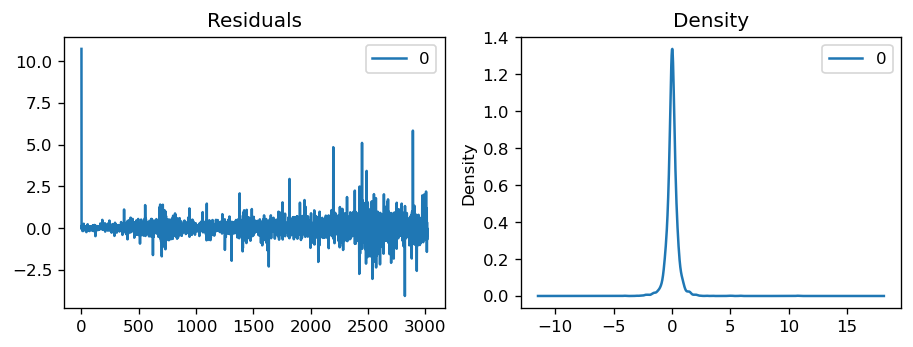

In [58]:
# Plot residual errors
residuals = pd.DataFrame(nke_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2400
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -1009.632
Date:                Fri, 10 Jun 2022   AIC                           2029.265
Time:                        12:21:21   BIC                           2058.177
Sample:                             0   HQIC                          2039.783
                               - 2400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0712      0.017     -4.138      0.000      -0.105      -0.037
ar.L2         -0.0462      0.017     -2.710      0.007      -0.080      -0.013
ar.L3         -0.0640      0.017     -3.726      0.0

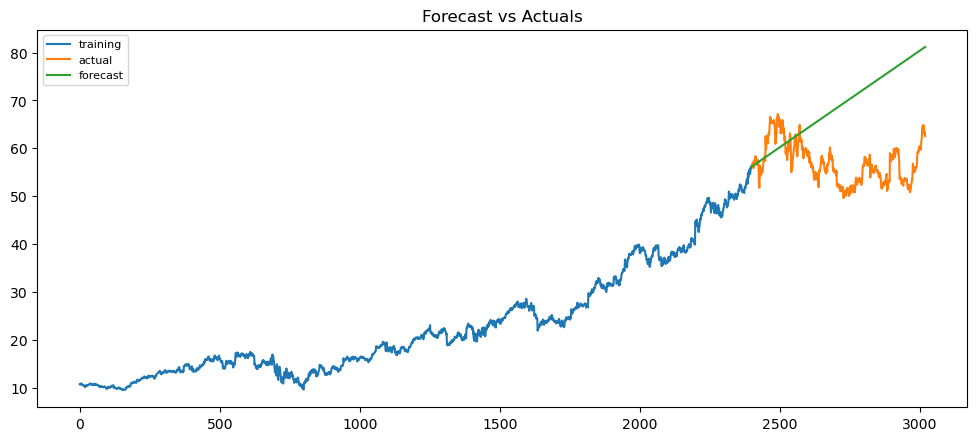

In [91]:
# Create Training and Test
train = nke_df.Close[:2400]
test = nke_df.Close[2400:]

# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc= fitted.forecast(620)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [92]:
forecast_accuracy(fc, test)

{'rmse': 15.235969506442348}

<AxesSubplot:>

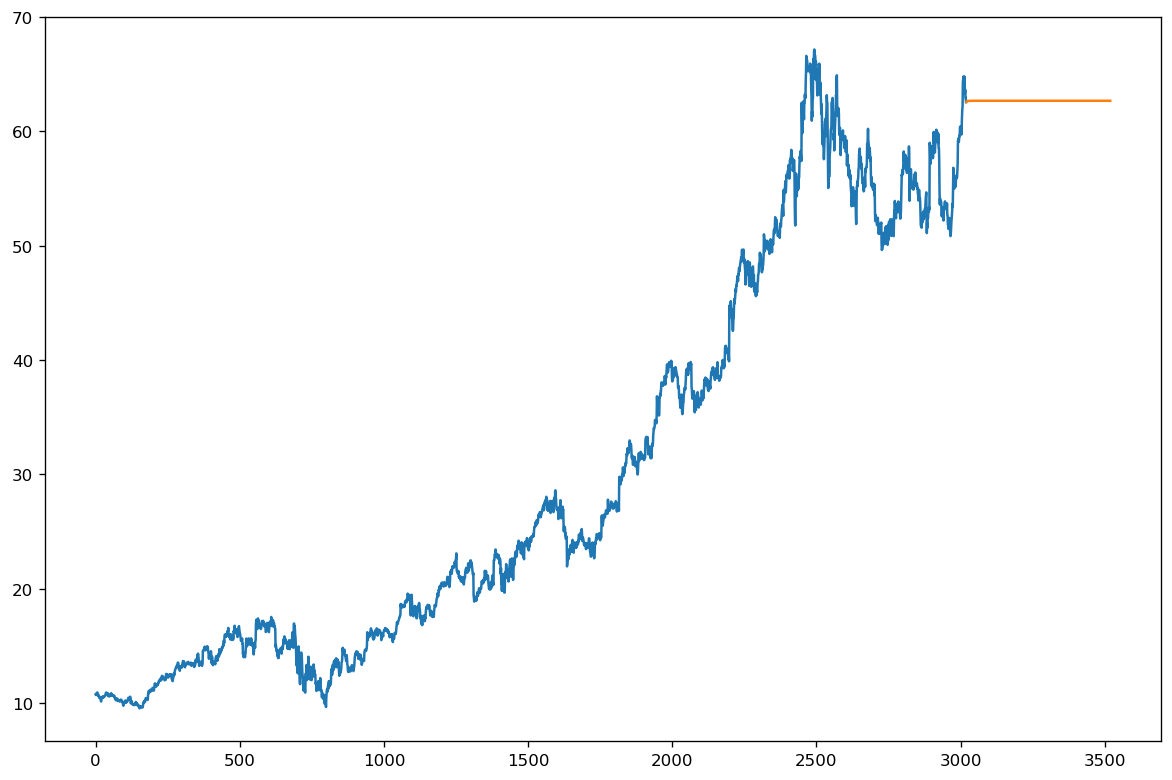

In [60]:
nke_df['Close'].plot(figsize=(12,8))
nke_model_fit.forecast(500).plot(figsize=(12,8))

# VZ

### RMSE is 3.5147859856993806

In [61]:
vz_model = ARIMA(vz_df['Close'], order=(1,1,1))
vz_model_fit =vz_model.fit()


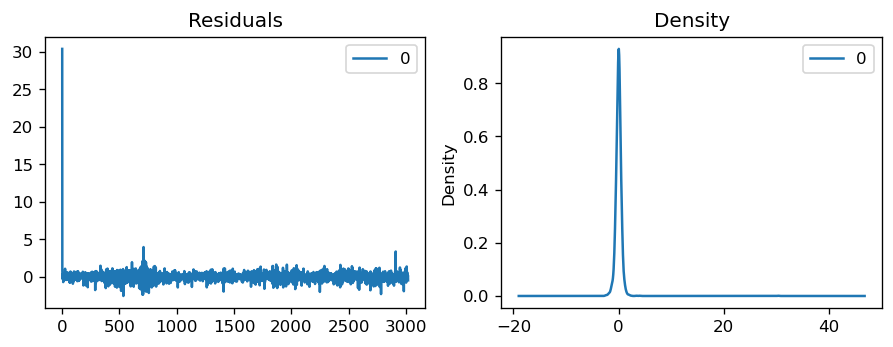

In [62]:
# Plot residual errors
residuals = pd.DataFrame(vz_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2400
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -1760.827
Date:                Fri, 10 Jun 2022   AIC                           3531.654
Time:                        12:22:18   BIC                           3560.566
Sample:                             0   HQIC                          3542.173
                               - 2400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0155      0.014     -1.136      0.256      -0.042       0.011
ar.L2         -0.0692      0.015     -4.649      0.000      -0.098      -0.040
ar.L3         -0.0202      0.015     -1.358      0.1

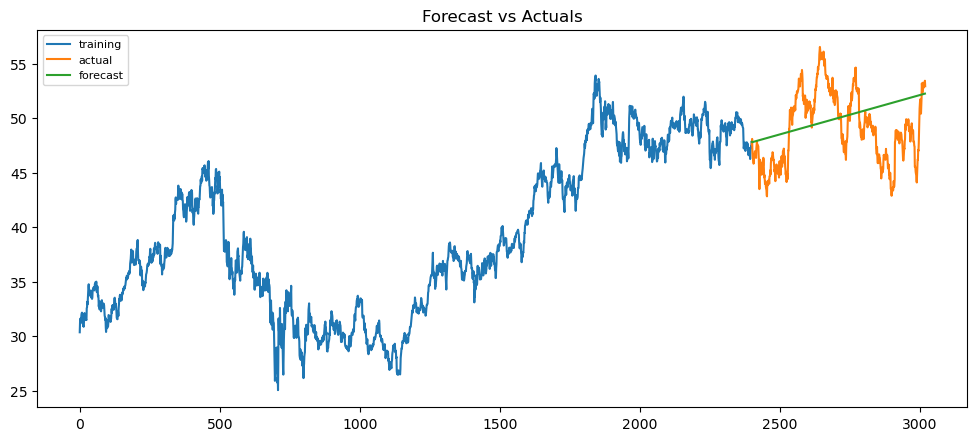

In [95]:
# Create Training and Test
train = vz_df.Close[:2400]
test = vz_df.Close[2400:]

# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc = fitted.forecast(619)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [96]:
forecast_accuracy(fc, test)

{'rmse': 3.5147859856993806}

<AxesSubplot:>

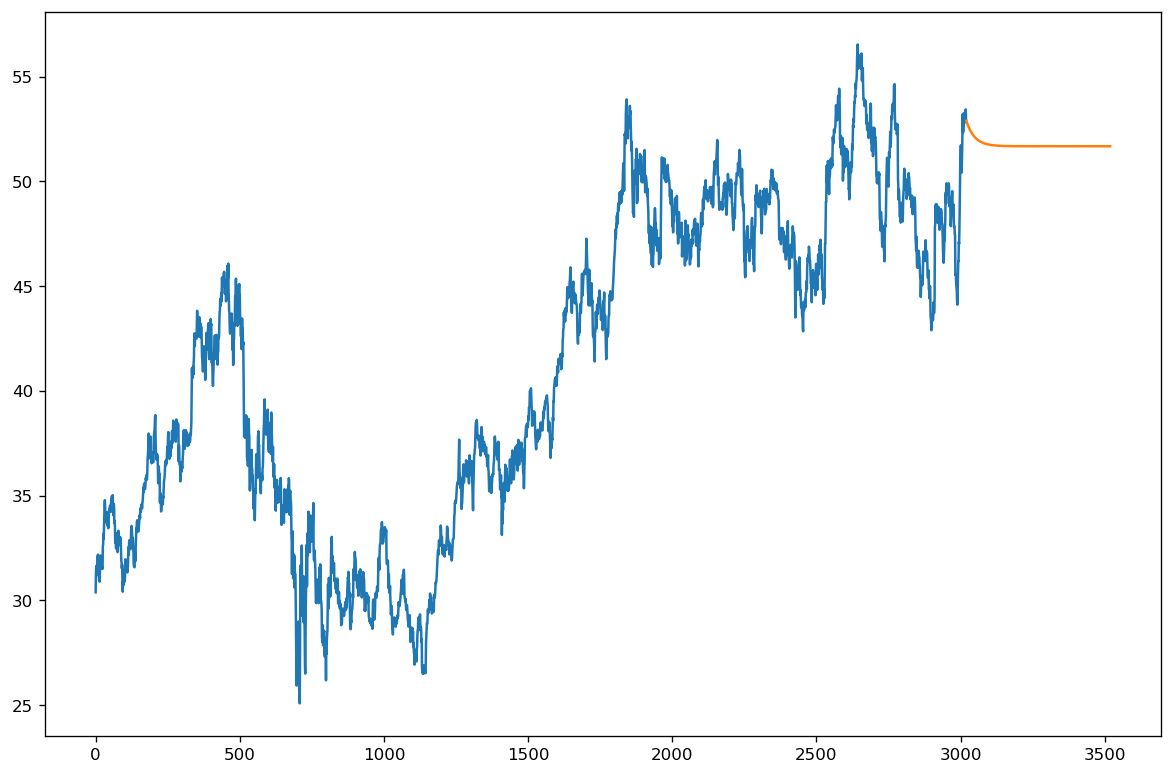

In [64]:
vz_df['Close'].plot(figsize=(12,8))
vz_model_fit.forecast(500).plot(figsize=(12,8))

# Exponential Smoothing


### RMSE values were the worst for the Exponential Smoothing models.

In [130]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [120]:
# aapl model

train = aapl_df.Close[:2500]
test = aapl_df.Close[2500:]

aapl_exp = ExponentialSmoothing(train).fit()
aapl_pred = aapl_exp.forecast(500)

C:\Users\Mike\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

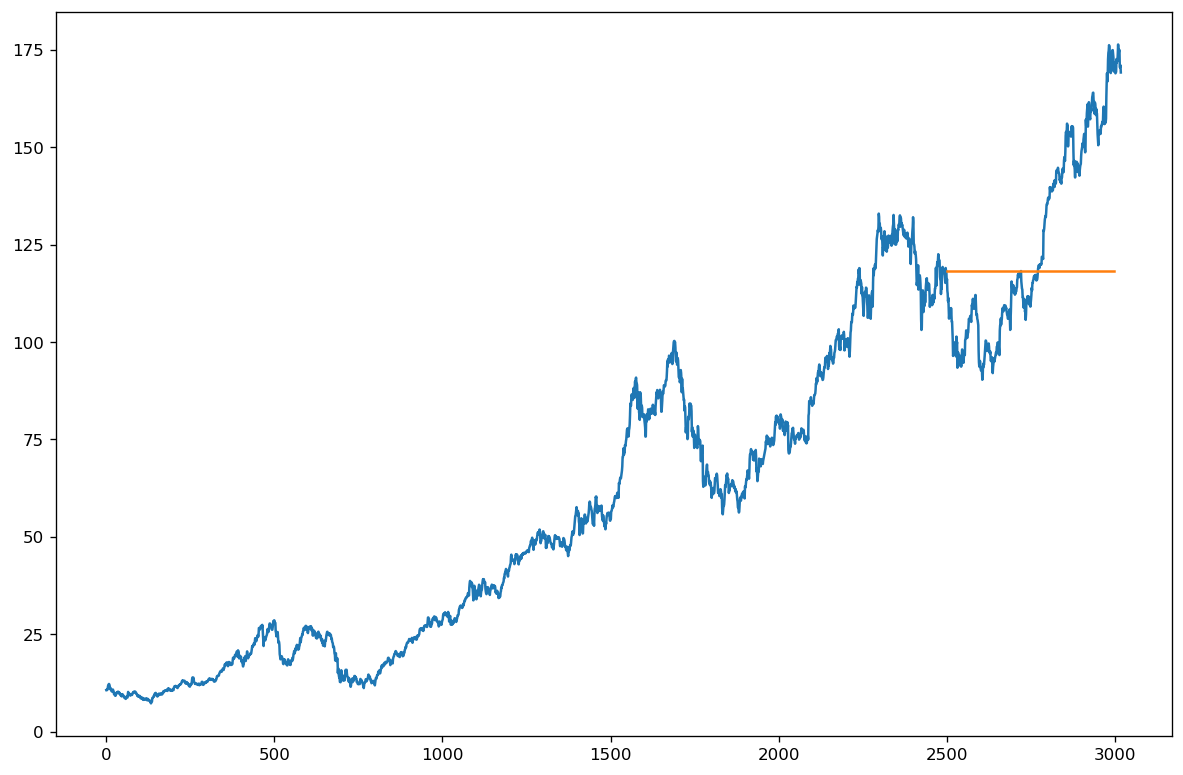

In [103]:
aapl_df['Close'].plot(figsize=(12,8))
aapl_pred.plot(figsize=(12,8))

In [121]:
forecast_accuracy(aapl_pred, test)

{'rmse': 25.43805308960394}

<AxesSubplot:>

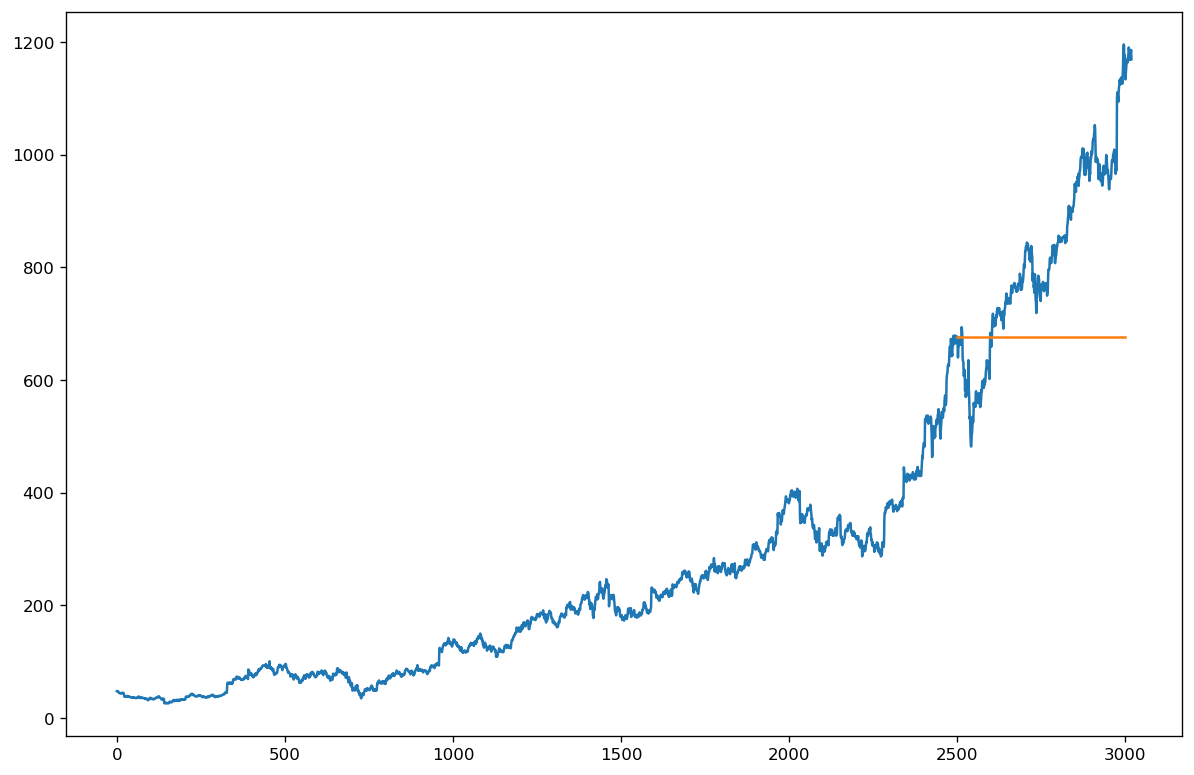

In [122]:
# amzn model

train = amzn_df.Close[:2500]
test = amzn_df.Close[2500:]

amzn_exp = ExponentialSmoothing(train).fit()
amzn_pred = amzn_exp.forecast(500)

amzn_df['Close'].plot(figsize=(12,8))
amzn_pred.plot(figsize=(12,8))

In [123]:
forecast_accuracy(amzn_pred, test)

{'rmse': 208.51732066686196}

C:\Users\Mike\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

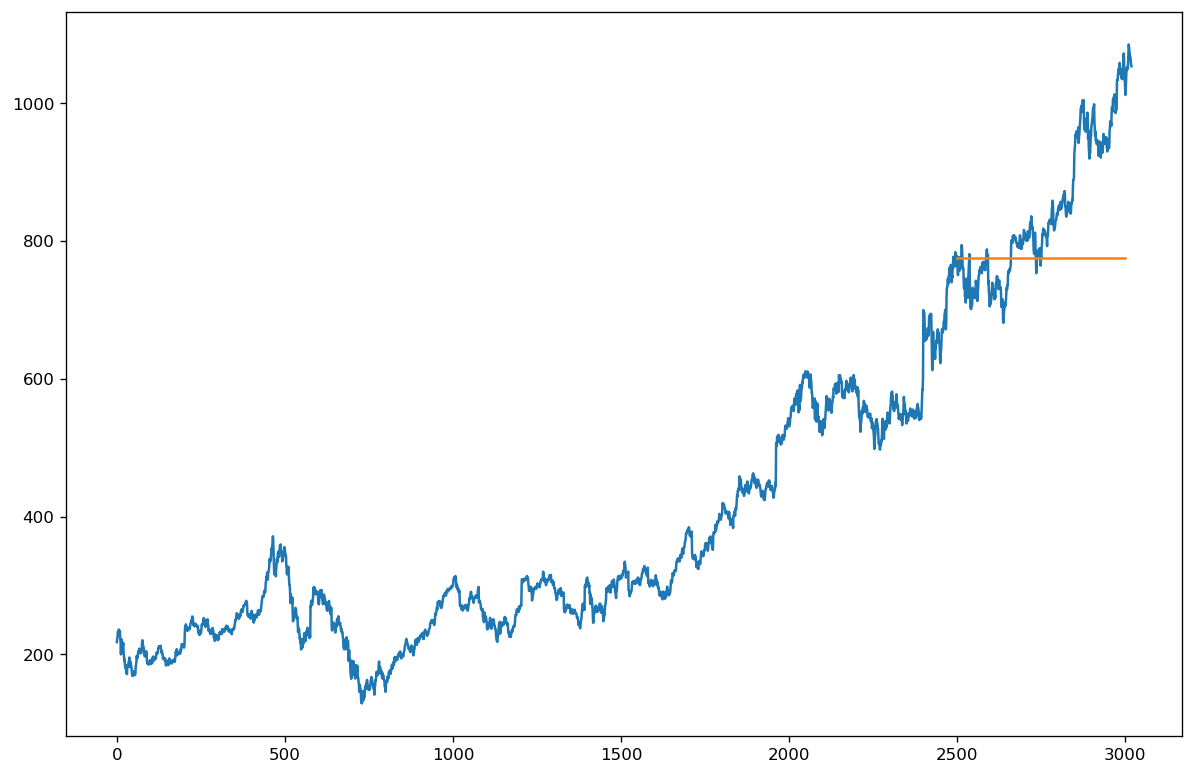

In [124]:
# googl model

train = googl_df.Close[:2500]
test = googl_df.Close[2500:]

googl_exp = ExponentialSmoothing(train).fit()
googl_pred = googl_exp.forecast(500)

googl_df['Close'].plot(figsize=(12,8))
googl_pred.plot(figsize=(12,8))

In [125]:
forecast_accuracy(googl_pred, test)

{'rmse': 119.27863937107753}

C:\Users\Mike\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

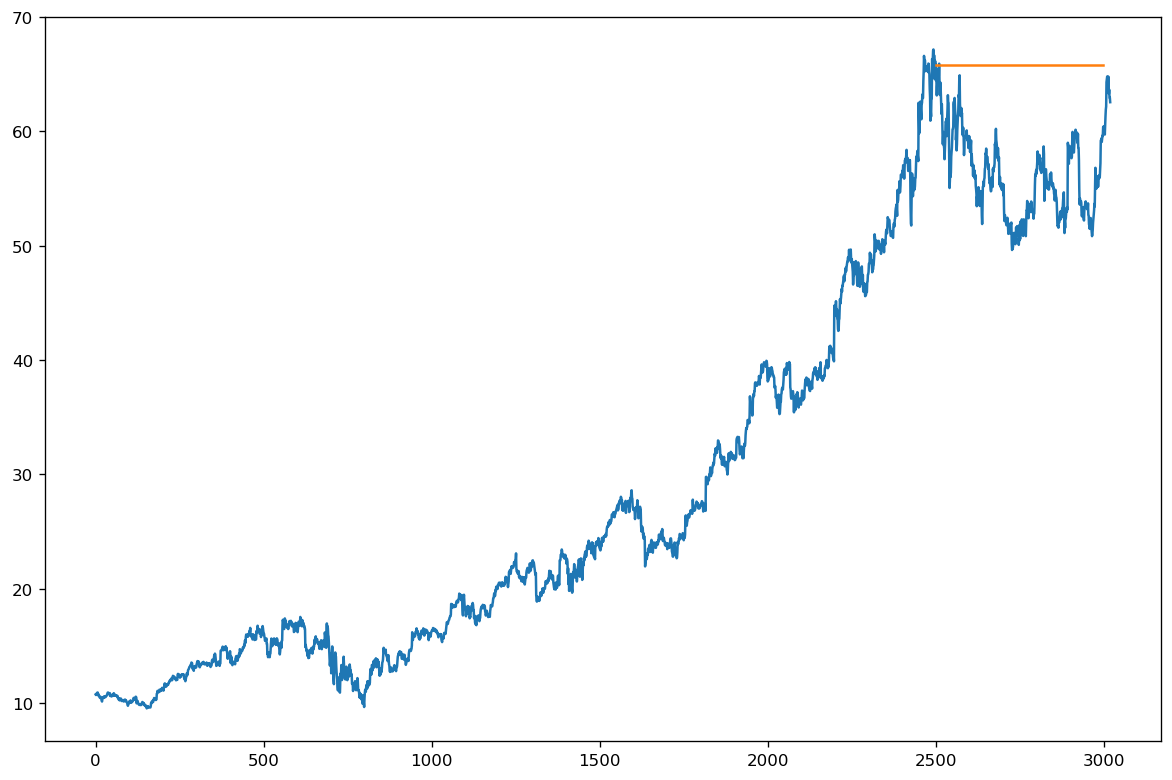

In [126]:
# nke model

train = nke_df.Close[:2500]
test = nke_df.Close[2500:]

nke_exp = ExponentialSmoothing(train).fit()
nke_pred = nke_exp.forecast(500)

nke_df['Close'].plot(figsize=(12,8))
nke_pred.plot(figsize=(12,8))

In [127]:
forecast_accuracy(vz_pred, test)

{'rmse': 10.850772319485879}

C:\Users\Mike\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

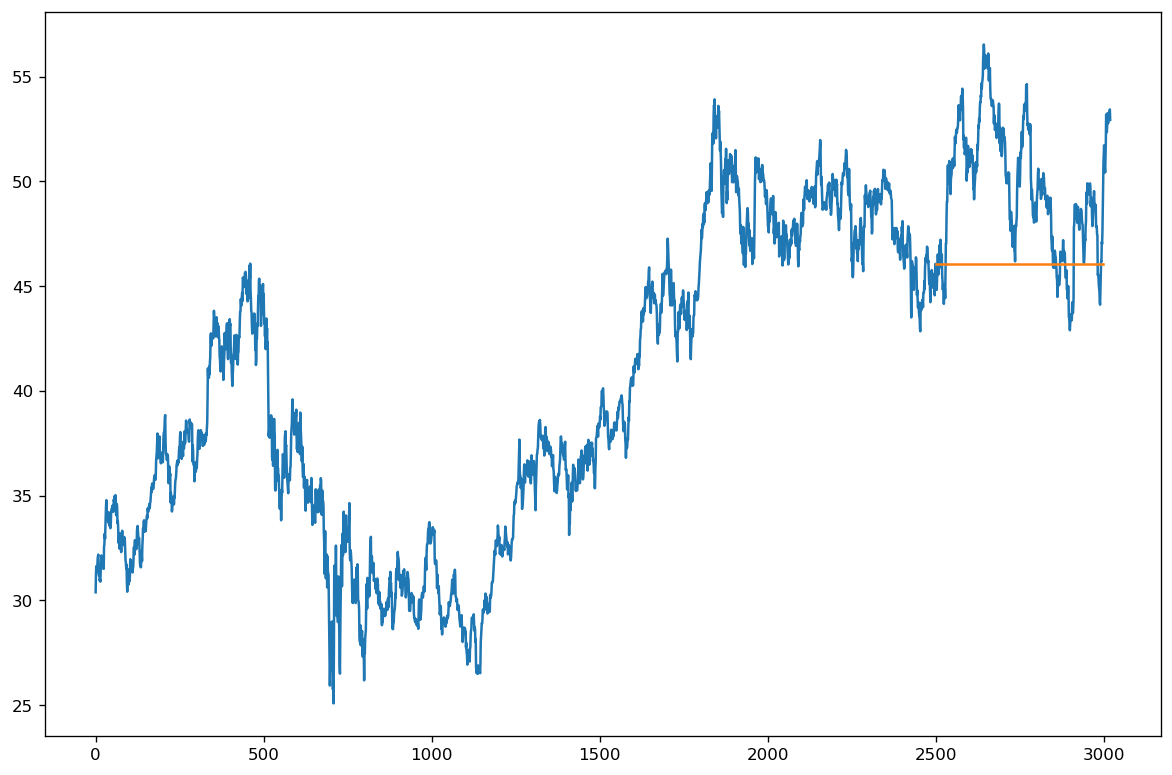

In [128]:
# vz model

train = vz_df.Close[:2500]
test = vz_df.Close[2500:]

vz_exp = ExponentialSmoothing(train).fit()
vz_pred = vz_exp.forecast(500)

vz_df['Close'].plot(figsize=(12,8))
vz_pred.plot(figsize=(12,8))

In [129]:
forecast_accuracy(vz_pred, test)

{'rmse': 4.670310547706794}

# Current findings show that the FBProphet model should be further explored to find the best model, according to the RMSE Scores